#                       Customer Churn Prediction with Explainable Machine Learning

## 1. Load Dataset & Initial Inspection

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set Seaborn style
sns.set(style="whitegrid")

# Load the Telco Churn dataset
df = pd.read_csv('../data/telco_churn.csv')

# Preview first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# View column names and data types
df.info()

Dataset contains 7043 rows and 21 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

In [5]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Display number of unique values in each column
print("\nUnique values per column:")
print(df.nunique())

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Unique values per column:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges   

### Convert TotalCharges to Numeric

In [7]:
# Convert TotalCharges to numeric (coerce invalid entries to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many values became NaN after conversion
print("Missing values in TotalCharges after conversion:", df['TotalCharges'].isna().sum())

# Optional: View affected rows
df[df['TotalCharges'].isna()]

Missing values in TotalCharges after conversion: 11


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Remove rows with missing TotalCharges

In [9]:
# Drop rows with missing TotalCharges
df = df[df['TotalCharges'].notna()]

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

# Confirm new shape
print(f"New dataset shape: {df.shape}")

New dataset shape: (7032, 21)


### Explore Target Variable: Churn Distribution

Target Variable Distribution:
Churn
No     5163
Yes    1869
Name: count, dtype: int64


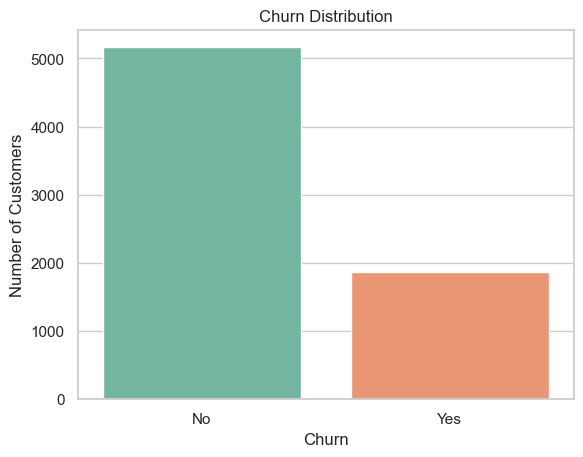

In [11]:
# Check distribution of target variable (Churn)
print("Target Variable Distribution:")
print(df['Churn'].value_counts())

# Plot churn distribution
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

## 2. Data Cleaning & Feature Classification

In this section, we'll:
- Drop unhelpful columns (like customerID)
- Identify numerical vs categorical features
- Prepare for encoding and scaling

In [13]:
# Drop customerID (not useful for ML)
df.drop('customerID', axis=1, inplace=True)

# Separate categorical and numerical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print them
print("Categorical columns:")
print(categorical_cols)

print("\nNumerical columns:")
print(numerical_cols)

Categorical columns:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Numerical columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


### Data Cleaning — Fixing Specific Issues

In [15]:
# Strip whitespace from all string (object) columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip())

# Confirm unique values in a few key columns
for col in ['MultipleLines', 'InternetService', 'OnlineSecurity', 'Churn']:
    print(f"\nUnique values in {col}: {df[col].unique()}")


Unique values in MultipleLines: ['No phone service' 'No' 'Yes']

Unique values in InternetService: ['DSL' 'Fiber optic' 'No']

Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']

Unique values in Churn: ['No' 'Yes']


## 3. Encode Target Variable (Churn)

We will convert the target column:
- "Yes" → 1 (Churned)
- "No" → 0 (Retained)

This prepares the dataset for machine learning.


In [26]:
# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Verify encoding
print(df['Churn'].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


## Exploratory Data Analysis — Numerical Features (Continuous)

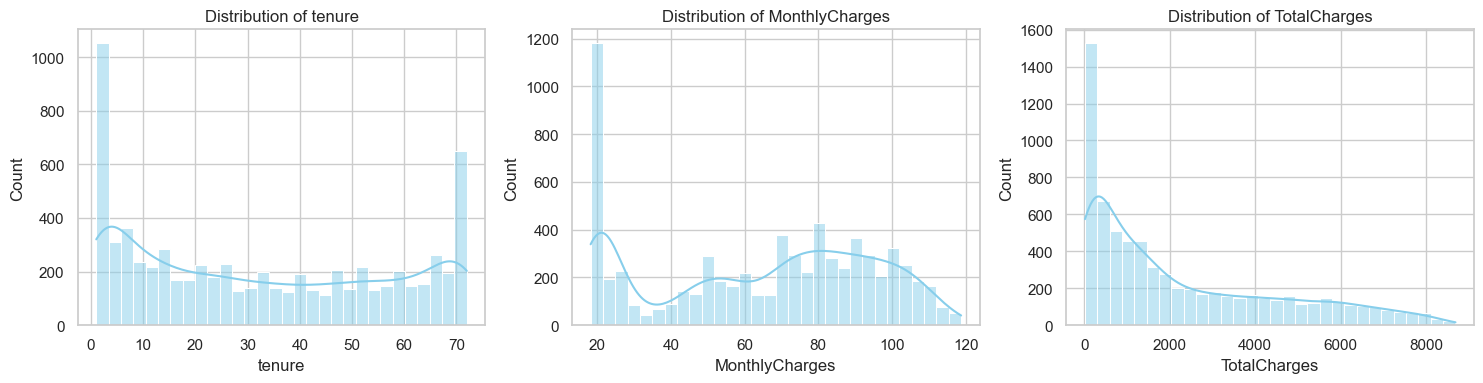

In [31]:
# Plot distributions of numerical features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### 📝 Interpretation of Numerical Feature Distributions

**Tenure (Customer Lifetime)**  
- The histogram shows a high concentration of customers in their early months (0–10 months).  
- There is also a small peak around ~70 months, indicating a group of long-term loyal customers.  
- This suggests many customers churn early, while those who stay longer are more likely to remain.

**MonthlyCharges**  
- The distribution is fairly spread out between 20–120 USD.  
- Two clusters appear:
  - Low-charge customers (~20–30 USD).  
  - High-charge customers (~70–90 USD).  
- This indicates that pricing plans form distinct groups, which may influence churn differently.

**TotalCharges**  
- The distribution is highly right-skewed.  
- Most customers have low total charges, consistent with new or short-tenure customers.  
- A smaller group accumulates high charges, corresponding to long-tenure, loyal customers.


## 4. Exploratory Data Analysis — Categorical Features
### Contract Type

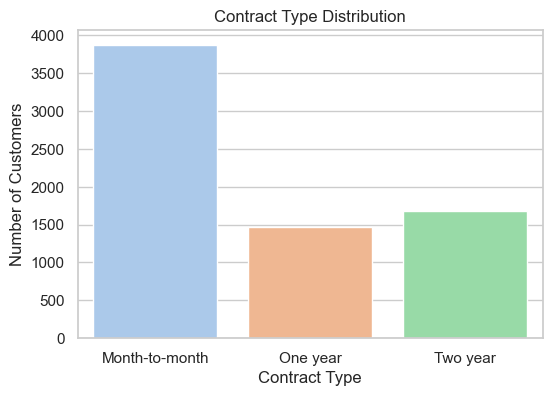

Churn Rate by Contract Type (%):
 Contract
Month-to-month    43.0
One year          11.0
Two year           3.0
Name: Churn, dtype: float64


In [39]:
# Plot distribution of Contract type
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', data=df, palette='pastel')
plt.title("Contract Type Distribution")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.show()

# Calculate churn rate by contract type
contract_churn = df.groupby('Contract')['Churn'].mean().round(2) * 100
print("Churn Rate by Contract Type (%):\n", contract_churn)

#### Interpretation: Contract Type and Churn

- **Distribution:**  
  Most customers are on **Month-to-Month contracts**, while fewer are on One-Year or Two-Year contracts.  

- **Churn Rates:**  
  - Month-to-Month → **43% churn rate** (highest)  
  - One-Year → **11% churn rate**  
  - Two-Year → **3% churn rate** (lowest)  

- **Business Insight:**  
  Customers with Month-to-Month contracts are much more likely to churn, since they are not tied down by a long-term commitment.  
  On the other hand, customers with longer contracts (One-Year and Two-Year) churn much less, showing that **contract length is a strong predictor of loyalty**.  

👉 This suggests telecom companies could reduce churn by offering discounts or incentives for customers to move from Month-to-Month to long-term contracts.


### Internet Service Type

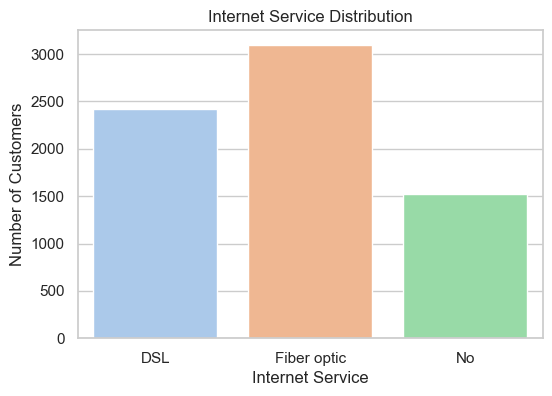

Churn Rate by Internet Service (%):
 InternetService
DSL            19.0
Fiber optic    42.0
No              7.0
Name: Churn, dtype: float64


In [50]:
# Plot distribution of Internet Service type
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', data=df, palette='pastel')
plt.title("Internet Service Distribution")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")
plt.show()

# Calculate churn rate by InternetService
internet_churn = df.groupby('InternetService')['Churn'].mean().round(2) * 100
print("Churn Rate by Internet Service (%):\n", internet_churn)

#### Internet Service Type and Churn

- **Distribution:**  
  Most customers use **DSL** or **Fiber optic** internet, while fewer do not subscribe to internet service.  

- **Business Insight:**  
  Customers with **Fiber optic internet** churn significantly more compared to DSL users, likely due to higher charges or dissatisfaction.  
  Customers with **no internet service** churn the least, as they are usually minimal users with low bills.  

👉 The company should investigate **pricing and service quality for Fiber optic users**, since they represent the highest-risk group for churn.

### Online Security and Churn

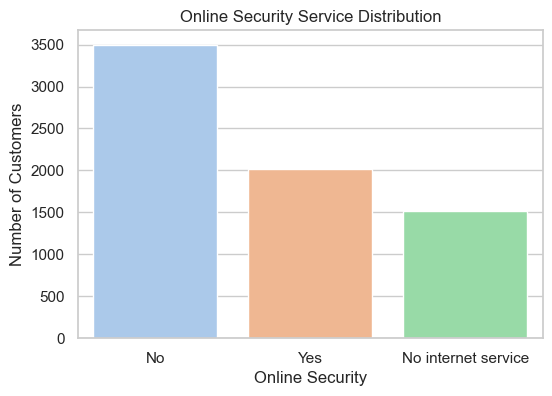

Churn Rate by Online Security (%):
 OnlineSecurity
No                     42.0
No internet service     7.0
Yes                    15.0
Name: Churn, dtype: float64


In [56]:
# Plot distribution of OnlineSecurity service
plt.figure(figsize=(6,4))
sns.countplot(x='OnlineSecurity', data=df, palette='pastel')
plt.title("Online Security Service Distribution")
plt.xlabel("Online Security")
plt.ylabel("Number of Customers")
plt.show()

# Calculate churn rate by OnlineSecurity
security_churn = df.groupby('OnlineSecurity')['Churn'].mean().round(2) * 100
print("Churn Rate by Online Security (%):\n", security_churn)

#### Online Security and Churn

- **Distribution:**  
  Many customers do not subscribe to online security services, while fewer have it enabled.  

- **Business Insight:**  
  Customers with **No Online Security** show the highest churn (~42%), while those with security have much lower churn (~15%).  
  Customers with **No Internet Service** have the lowest churn (~7%), as they are typically minimal users.  

👉 This shows that **value-added services like Online Security help retain customers**, and customers without them are at greater churn risk.

### Payment Method and Churn

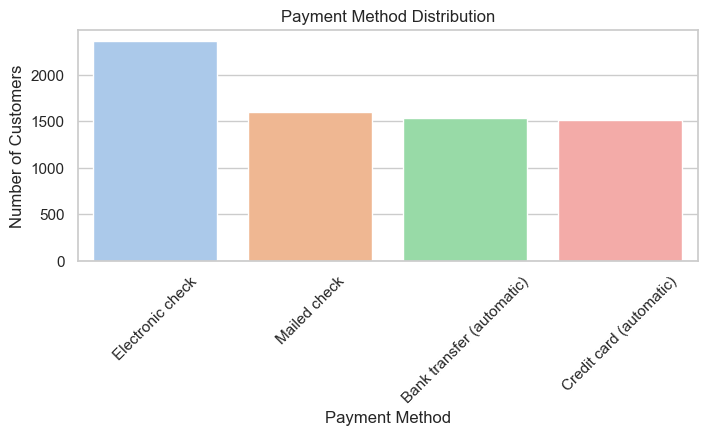

Churn Rate by Payment Method (%):
 PaymentMethod
Bank transfer (automatic)    17.0
Credit card (automatic)      15.0
Electronic check             45.0
Mailed check                 19.0
Name: Churn, dtype: float64


In [69]:
# Plot distribution of Payment Method
plt.figure(figsize=(8,3))
sns.countplot(x='PaymentMethod', data=df, palette='pastel')
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

# Calculate churn rate by Payment Method
payment_churn = df.groupby('PaymentMethod')['Churn'].mean().round(2) * 100
print("Churn Rate by Payment Method (%):\n", payment_churn)

#### Payment Method Analysis

- Customers pay through four main methods: **Electronic check, Mailed check, Credit card (automatic), and Bank transfer (automatic)**.  
- The churn rates are:
  - **Electronic check** → 45% churn (highest)
  - **Mailed check** → 19% churn
  - **Bank transfer (automatic)** → 17% churn
  - **Credit card (automatic)** → 15% churn (lowest)
- This shows that **Electronic check users are far more likely to churn**, probably because it is a manual and flexible payment method, easier to stop at any time.  
- By contrast, **automatic payment methods (Credit Card, Bank Transfer)** lead to much lower churn, since customers are “locked in” through automated billing.  
- Thus, **payment method is a strong behavioral predictor of churn**.


### Tech Support Service

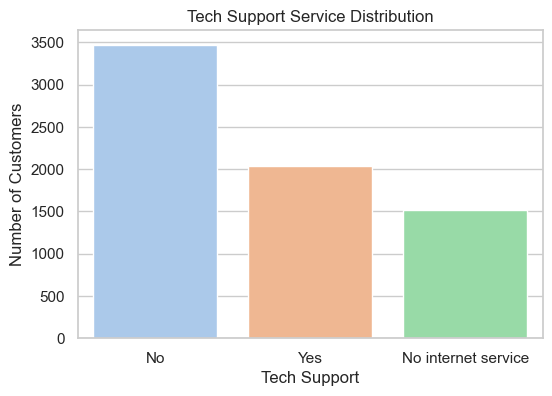

Churn Rate by Tech Support (%):
 TechSupport
No                     42.0
No internet service     7.0
Yes                    15.0
Name: Churn, dtype: float64


In [75]:
# Plot distribution of Tech Support service
plt.figure(figsize=(6,4))
sns.countplot(x='TechSupport', data=df, palette='pastel')
plt.title("Tech Support Service Distribution")
plt.xlabel("Tech Support")
plt.ylabel("Number of Customers")
plt.show()

# Calculate churn rate by Tech Support
tech_churn = df.groupby('TechSupport')['Churn'].mean().round(2) * 100
print("Churn Rate by Tech Support (%):\n", tech_churn)

#### Tech Support Analysis

- A majority of customers do **not subscribe** to Tech Support.  
- The churn rates show:
  - **No Tech Support** → 42% churn (highest risk group)
  - **With Tech Support** → 15% churn (much lower)
  - **No Internet Service** → 7% churn (lowest)
- This demonstrates that **access to Tech Support greatly reduces churn**.  
- Customers with Tech Support are more likely to stay because service issues and technical frustrations are resolved quickly.  
- Similar to Online Security, Tech Support is a **critical predictor of churn**, showing the value of bundled services in customer retention.

## Paperless Billing and Churn

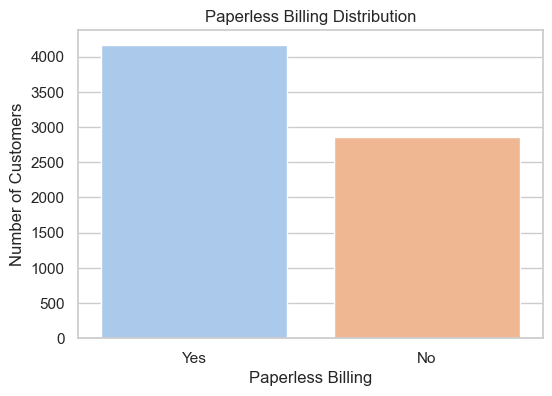

Churn Rate by Paperless Billing (%):
 PaperlessBilling
No     16.0
Yes    34.0
Name: Churn, dtype: float64


In [79]:
# Plot distribution of Paperless Billing
plt.figure(figsize=(6,4))
sns.countplot(x='PaperlessBilling', data=df, palette='pastel')
plt.title("Paperless Billing Distribution")
plt.xlabel("Paperless Billing")
plt.ylabel("Number of Customers")
plt.show()

# Calculate churn rate by Paperless Billing
billing_churn = df.groupby('PaperlessBilling')['Churn'].mean().round(2) * 100
print("Churn Rate by Paperless Billing (%):\n", billing_churn)

#### Paperless Billing Analysis

- Customers are roughly balanced between **Paperless Billing (Yes)** and **Traditional Billing (No)**.  
- The churn rates are:
  - **Paperless Billing = Yes** → 34% churn (much higher risk)
  - **Paperless Billing = No** → 16% churn (lower risk)
- This shows that **customers on paperless billing are more likely to churn**.  
- A possible reason is that paperless billing is strongly associated with **Electronic Check** payments and **Month-to-Month contracts**, both of which are high-risk churn segments.  
- In contrast, customers on traditional billing may be tied to longer-term or more stable payment methods, reducing their churn likelihood.  
- Hence, Paperless Billing is an **indirect but important predictor of churn**, especially when combined with Payment Method and Contract type.

### Other Categorical Features (Batch Analysis)

In this section, we quickly explore categorical features that are less strongly correlated with churn:
- Gender
- SeniorCitizen
- Partner
- Dependents
- PhoneService
- MultipleLines
- StreamingTV
- StreamingMovies

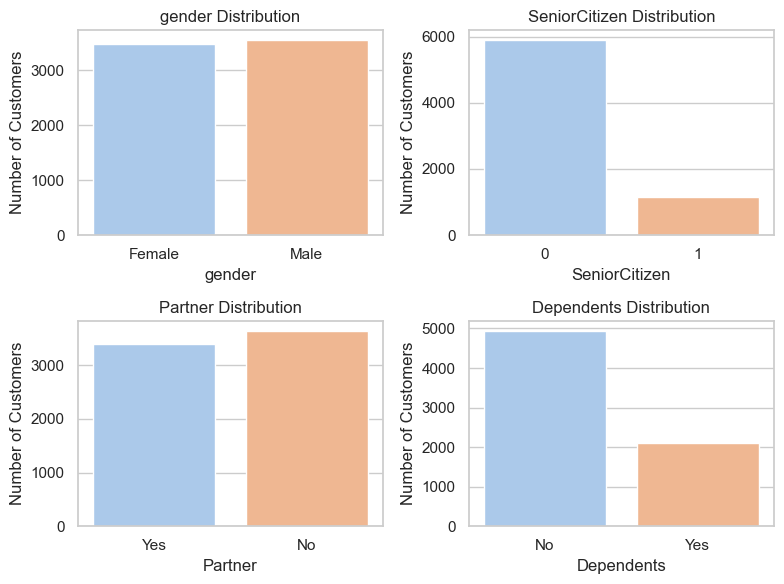

In [99]:
# Features: gender, SeniorCitizen, Partner, Dependents
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(8, 6))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()

- **Gender** → Distribution is balanced between male and female; churn differences are minimal.  
- **SeniorCitizen** → Senior citizens show slightly higher churn, but effect is weaker compared to contract/payment features.  
- **Partner & Dependents** → Customers with partners or dependents churn less, indicating family stability reduces churn risk.

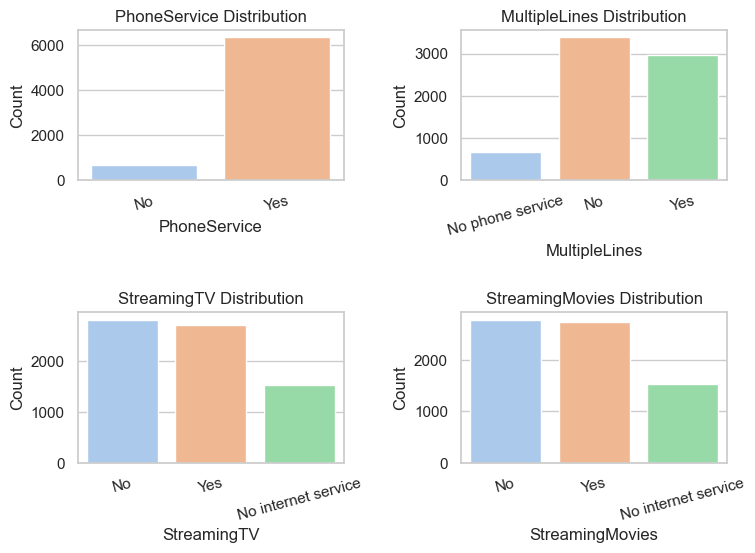

In [107]:
# Features: PhoneService, MultipleLines, StreamingTV, StreamingMovies
cols = ['PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(8, 6))  
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=15)  

plt.tight_layout(pad=2.0)
plt.show()

- **PhoneService & MultipleLines** → Distribution is balanced; churn difference is minor.  
- **StreamingTV & StreamingMovies** → Add-on streaming services do not strongly influence churn by themselves, but may interact with internet service type.  
- These features are less predictive compared to the "Big 6" (Contract, InternetService, OnlineSecurity, TechSupport, PaymentMethod, PaperlessBilling).

## 5. Train/Test Split

We separate features (X) and target (y), then split into training and testing sets.
Stratification ensures the churn ratio is preserved in both sets.

In [111]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split (80/20) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Sanity check
print("Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

print("\nChurn ratio:")
print("Overall:", y.mean().round(3))
print("Train: ", y_train.mean().round(3))
print("Test:  ", y_test.mean().round(3))

Shapes:
X_train: (5625, 19) X_test: (1407, 19)
y_train: (5625,) y_test: (1407,)

Churn ratio:
Overall: 0.266
Train:  0.266
Test:   0.266


## 6. Data Preprocessing & Baseline Model (Pipeline)


In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Get feature types again (from training set only)
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)

# Preprocessor: scale numeric + one-hot encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="if_binary"), categorical_cols),
    ]
)

# Logistic Regression (baseline)
log_reg = LogisticRegression(class_weight="balanced", solver="liblinear", max_iter=1000)

# Full pipeline
pipe_lr = Pipeline(steps=[("prep", preprocessor),
                         ("model", log_reg)])

# Fit pipeline
pipe_lr.fit(X_train, y_train)

# Check feature count after preprocessing
n_feats = pipe_lr.named_steps["prep"].transform(X_train).shape[1]
print("Features after preprocessing:", n_feats)

Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Features after preprocessing: 40


## 7. Model Evaluation — Logistic Regression (Baseline)

=== Baseline Logistic Regression (Pipeline) ===
Accuracy:  0.725
Precision: 0.489
Recall:    0.794
F1-score:  0.606
ROC-AUC:   0.835

Classification Report:
               precision    recall  f1-score   support

           0      0.904     0.700     0.789      1033
           1      0.489     0.794     0.606       374

    accuracy                          0.725      1407
   macro avg      0.697     0.747     0.697      1407
weighted avg      0.794     0.725     0.740      1407



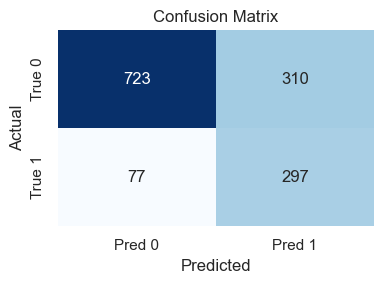

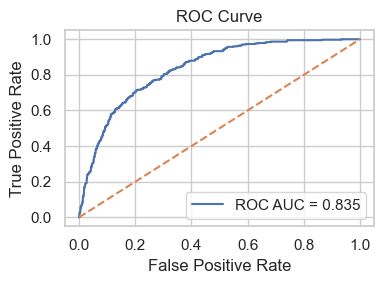

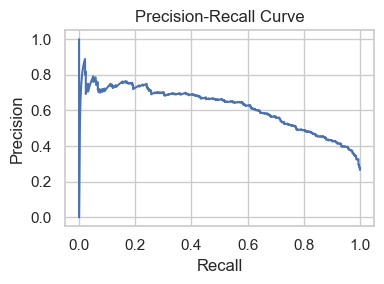

In [120]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = pipe_lr.predict(X_test)
y_proba = pipe_lr.predict_proba(X_test)[:, 1]

# Core metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)

print("=== Baseline Logistic Regression (Pipeline) ===")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"ROC-AUC:   {auc:.3f}\n")

print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(4,3))
plt.plot(fpr, tpr, label=f"ROC AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# Precision-Recall Curve
prec_curve, rec_curve, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(4,3))
plt.plot(rec_curve, prec_curve)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.tight_layout()
plt.show()

## 8. Model 2 — Random Forest Classifier (Pipeline)

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline

# Random Forest pipeline (reuse preprocessor)
rf_clf = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,       # a bit higher for stability
        max_depth=None,
        class_weight="balanced",
        n_jobs=-1,              # <-- use all cores
        random_state=42
    ))
])

# Fit
rf_clf.fit(X_train, y_train)

# Predict
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# Metrics
acc  = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec  = recall_score(y_test, y_pred_rf)
f1   = f1_score(y_test, y_pred_rf)
auc  = roc_auc_score(y_test, y_proba_rf)

print("=== Random Forest Classifier ===")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"ROC-AUC:   {auc:.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_rf, digits=3))

=== Random Forest Classifier ===
Accuracy:  0.785
Precision: 0.624
Recall:    0.479
F1-score:  0.542
ROC-AUC:   0.816

Classification Report:
               precision    recall  f1-score   support

           0      0.826     0.895     0.859      1033
           1      0.624     0.479     0.542       374

    accuracy                          0.785      1407
   macro avg      0.725     0.687     0.700      1407
weighted avg      0.772     0.785     0.775      1407



## 9. Model 3 — XGBoost Classifier

In [126]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
import numpy as np

# Compute scale_pos_weight from training data: (negatives / positives)
pos = np.sum(y_train == 1)
neg = np.sum(y_train == 0)
spw = neg / pos
print(f"scale_pos_weight (neg/pos): {spw:.2f}")

# XGBoost pipeline
xgb_clf = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=spw,     # <- dynamic imbalance handling
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

# Fit
xgb_clf.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# Evaluate
acc  = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec  = recall_score(y_test, y_pred_xgb)
f1   = f1_score(y_test, y_pred_xgb)
auc  = roc_auc_score(y_test, y_proba_xgb)

print("=== XGBoost Classifier ===")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"ROC-AUC:   {auc:.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb, digits=3))

scale_pos_weight (neg/pos): 2.76
=== XGBoost Classifier ===
Accuracy:  0.746
Precision: 0.515
Recall:    0.749
F1-score:  0.610
ROC-AUC:   0.827

Classification Report:
               precision    recall  f1-score   support

           0      0.891     0.744     0.811      1033
           1      0.515     0.749     0.610       374

    accuracy                          0.746      1407
   macro avg      0.703     0.747     0.711      1407
weighted avg      0.791     0.746     0.758      1407



## 10. Model Explainability — Feature Importance (XGBoost)

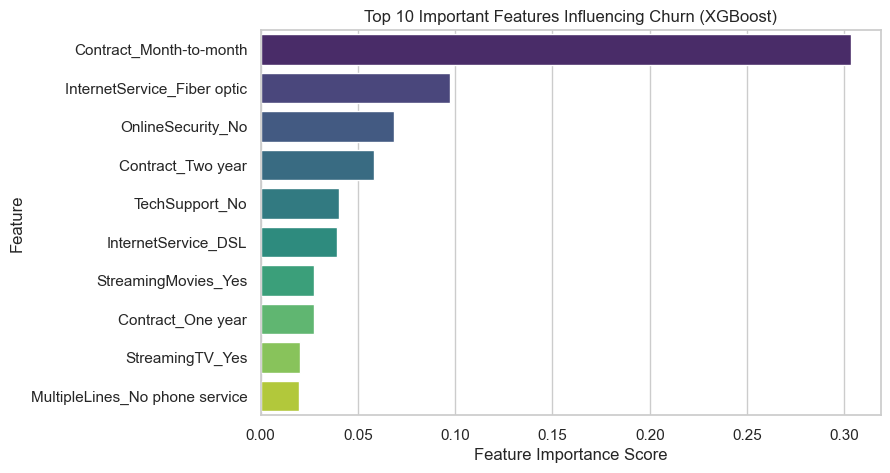

,Feature,Importance
32,Contract_Month-to-month,0.303329
12,InternetService_Fiber optic,0.097421
14,OnlineSecurity_No,0.068667
34,Contract_Two year,0.058443
23,TechSupport_No,0.040492
11,InternetService_DSL,0.039301
31,StreamingMovies_Yes,0.027515
33,Contract_One year,0.027411
28,StreamingTV_Yes,0.020169
9,MultipleLines_No phone service,0.019786


In [129]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature names after preprocessing
feature_names = (
    xgb_clf.named_steps["prep"]
    .transformers_[1][1]
    .get_feature_names_out(xgb_clf.named_steps["prep"].transformers_[1][2])
    .tolist()
)
feature_names = xgb_clf.named_steps["prep"].transformers_[0][2] + feature_names

# Get feature importances
importances = xgb_clf.named_steps["model"].feature_importances_

# Create DataFrame for easy sorting
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 10 features
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df.head(10), palette="viridis")
plt.title("Top 10 Important Features Influencing Churn (XGBoost)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

# Display top 10 features
feat_imp_df.head(10)

## 11A. Explainability — SHAP Analysis (for XGBoost Model)

In [138]:
!pip install shap -q

Train transformed shape: (5625, 40)
Test transformed shape : (1407, 40)
Feature names count    : 40


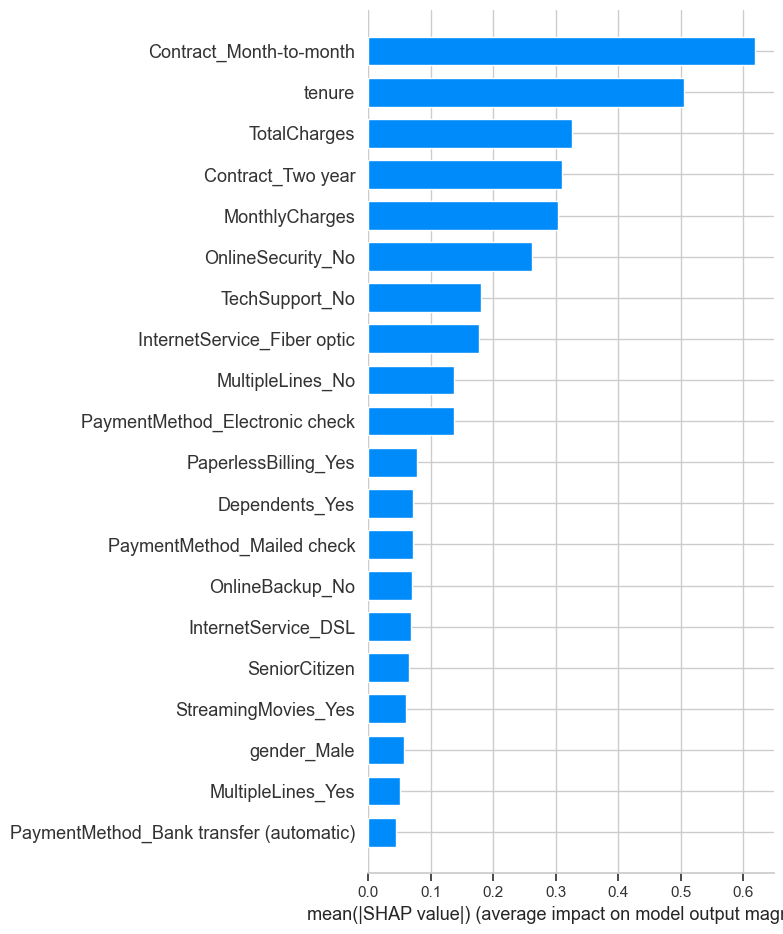

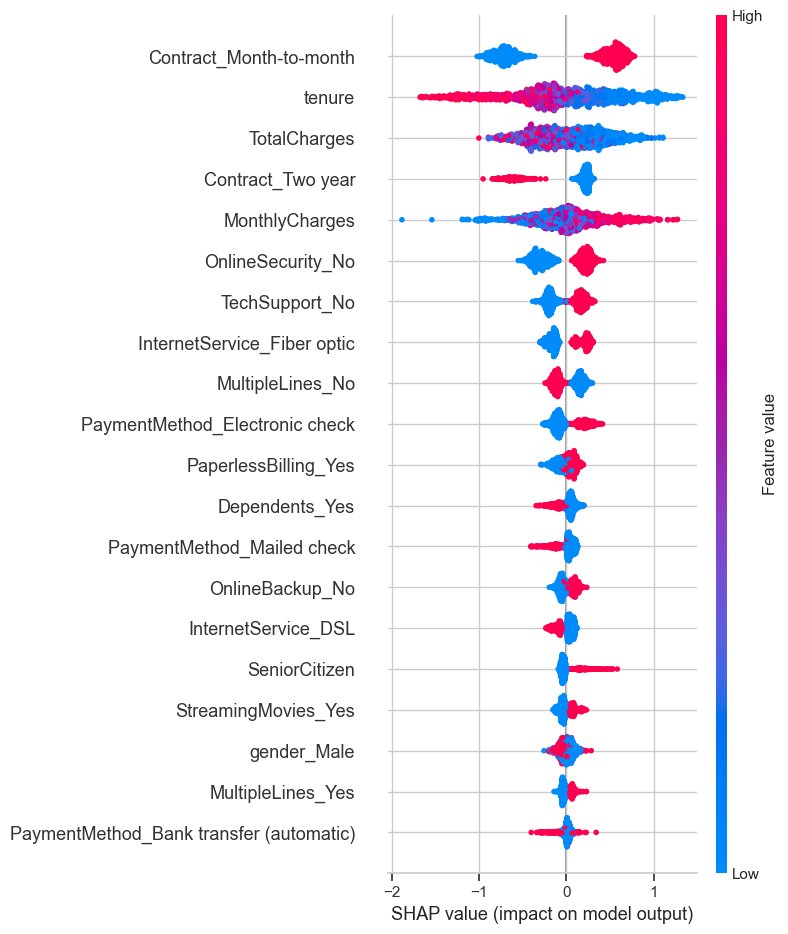

Explaining test row index: 3


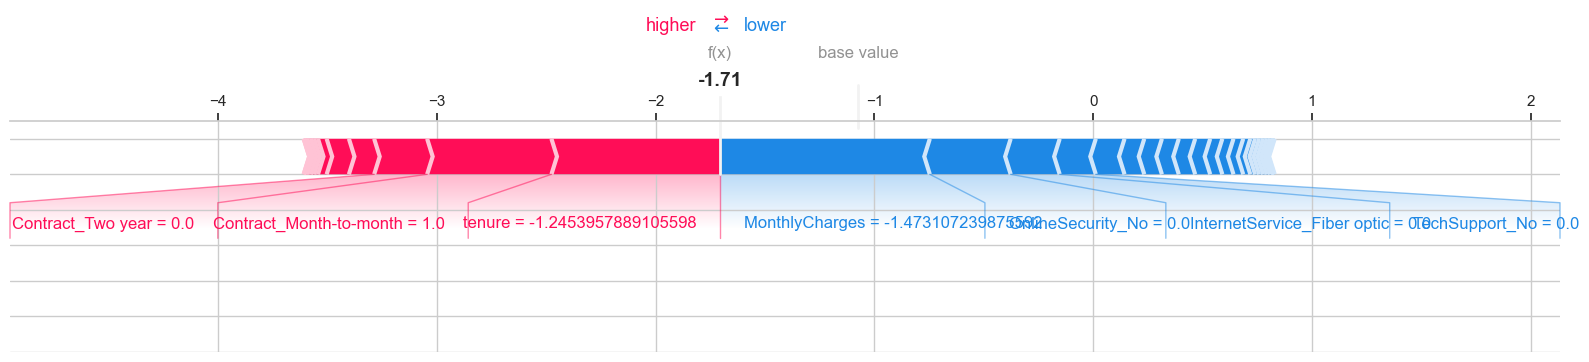

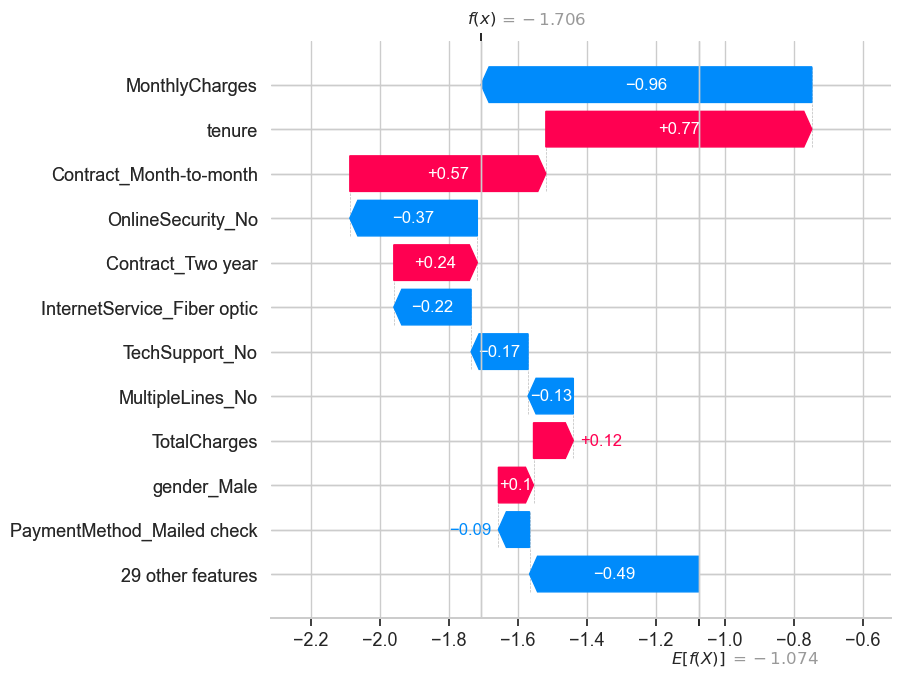

,Feature,Mean |SHAP|
32,Contract_Month-to-month,0.618792
1,tenure,0.504947
3,TotalCharges,0.325755
34,Contract_Two year,0.310503
2,MonthlyCharges,0.304259
14,OnlineSecurity_No,0.261607
23,TechSupport_No,0.180951
12,InternetService_Fiber optic,0.177388
8,MultipleLines_No,0.137785
38,PaymentMethod_Electronic check,0.137161


In [140]:
import numpy as np
import pandas as pd
import shap

# 1) Pull trained pieces
xgb_model = xgb_clf.named_steps["model"]
prep      = xgb_clf.named_steps["prep"]

# 2) Transform TRAIN and TEST exactly as model sees them
X_train_tx = prep.transform(X_train)
X_test_tx  = prep.transform(X_test)

# Densify if sparse (needed for some SHAP/plot backends)
if hasattr(X_train_tx, "toarray"):
    X_train_tx = X_train_tx.toarray()
if hasattr(X_test_tx, "toarray"):
    X_test_tx = X_test_tx.toarray()

# 3) Feature names: numeric first, then expanded OHE categorical
ohe = prep.named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
feature_names = np.concatenate([numerical_cols, cat_feature_names])

print("Train transformed shape:", X_train_tx.shape)
print("Test transformed shape :", X_test_tx.shape)
print("Feature names count    :", len(feature_names))

# 4) Build TreeExplainer with a small TRAIN background sample (stable & fast)
#    Use ~1000 rows or all rows if small.
bg_idx = np.random.RandomState(42).choice(X_train_tx.shape[0], 
                                          size=min(1000, X_train_tx.shape[0]), 
                                          replace=False)
background = X_train_tx[bg_idx]

explainer = shap.TreeExplainer(xgb_model, data=background)
shap_values = explainer.shap_values(X_test_tx)  # shape: (n_samples, n_features) for binary

# 5) GLOBAL IMPORTANCE (bar)
shap.summary_plot(shap_values, features=X_test_tx, feature_names=feature_names, plot_type="bar")

# 6) GLOBAL DISTRIBUTION (beeswarm)
shap.summary_plot(shap_values, features=X_test_tx, feature_names=feature_names)

# 7) LOCAL EXPLANATION for a churned example if available
#    Find first churned example in test set; else use first row
try:
    churn_indices = np.where(y_test.values == 1)[0]
    idx = int(churn_indices[0]) if len(churn_indices) > 0 else 0
except Exception:
    idx = 0

# Handle expected_value shape across SHAP versions
exp_val = explainer.expected_value
if isinstance(exp_val, (list, np.ndarray)) and np.ndim(exp_val) > 0:
    exp_val = exp_val[0]  # binary case

print("Explaining test row index:", idx)

# Force plot (static)
shap.force_plot(
    base_value=exp_val,
    shap_values=shap_values[idx, :],
    features=X_test_tx[idx, :],
    feature_names=feature_names,
    matplotlib=True
)

# Waterfall (legacy fallback, often renders nicer in notebooks)
try:
    from shap.plots import _waterfall
    _waterfall.waterfall_legacy(
        exp_val,
        shap_values[idx],
        feature_names=feature_names,
        max_display=12
    )
except Exception as e:
    print("Waterfall plot fallback skipped:", e)

# 8) Top-10 SHAP features table (mean |SHAP|)
shap_importance = np.abs(shap_values).mean(axis=0)
shap_summary = pd.DataFrame({"Feature": feature_names,
                             "Mean |SHAP|": shap_importance}) \
                  .sort_values("Mean |SHAP|", ascending=False) \
                  .head(10)
shap_summary

## 11B. Model Comparison — Logistic Regression vs Random Forest vs XGBoost

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.725,0.489,0.794,0.606,0.835
1,Random Forest,0.785,0.624,0.479,0.542,0.816
2,XGBoost,0.746,0.515,0.749,0.610,0.827


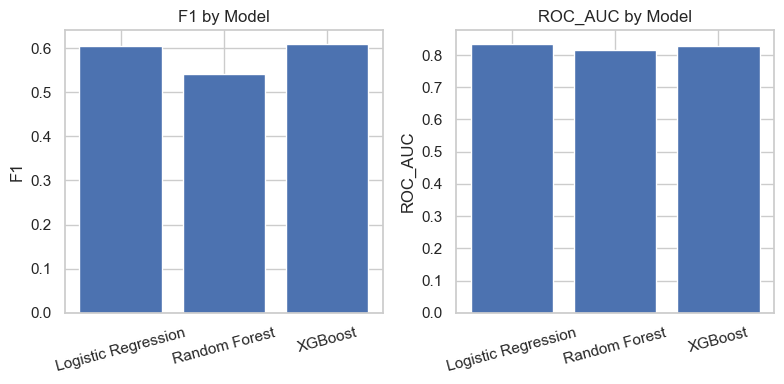

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect metrics you already computed
# (Fill these from your actual runs if they differ)
metrics = [
    {
        "Model": "Logistic Regression",
        "Accuracy": 0.725,   # replace with your LR value
        "Precision": 0.489,
        "Recall": 0.794,
        "F1": 0.606,
        "ROC_AUC": 0.835
    },
    {
        "Model": "Random Forest",
        "Accuracy": 0.785,   # from your RF output
        "Precision": 0.624,
        "Recall": 0.479,
        "F1": 0.542,
        "ROC_AUC": 0.816
    },
    {
        "Model": "XGBoost",
        "Accuracy": 0.746,   # from your XGB output
        "Precision": 0.515,
        "Recall": 0.749,
        "F1": 0.610,
        "ROC_AUC": 0.827
    }
]

df_cmp = pd.DataFrame(metrics)

# Show table
display(df_cmp.style.format({c: "{:.3f}" for c in df_cmp.columns if c != "Model"}))

# Bar chart for quick visual comparison (use F1 and ROC-AUC commonly)
plt.figure(figsize=(8,4))
for i, metric in enumerate(["F1", "ROC_AUC"], start=1):
    plt.subplot(1, 2, i)
    plt.bar(df_cmp["Model"], df_cmp[metric])
    plt.title(metric + " by Model")
    plt.xticks(rotation=15)
    plt.ylabel(metric)
plt.tight_layout()
plt.show()

## 12. Threshold Tuning & Precision–Recall Trade-off (XGBoost)

Best F1 threshold: 0.486  (F1=0.616)
Threshold for Recall ≥ 0.80: 0.414

=== Metrics @ Best-F1 Threshold ===
Threshold=0.486 | Precision=0.515 | Recall=0.765 | F1=0.616
Confusion Matrix:
 [[764 269]
 [ 88 286]]

=== Metrics @ Recall-Target Threshold ===
Threshold=0.414 | Precision=0.485 | Recall=0.802 | F1=0.605
Confusion Matrix:
 [[715 318]
 [ 74 300]]


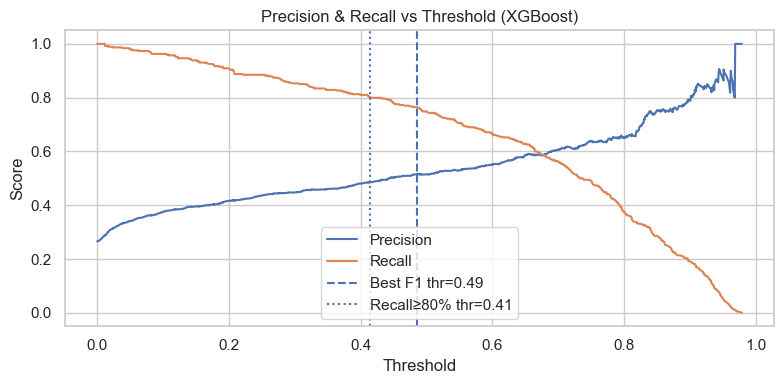

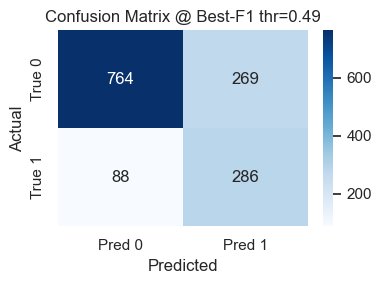

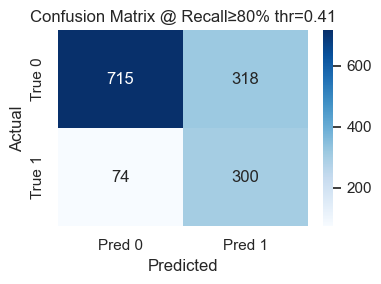

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_curve, confusion_matrix, precision_score, recall_score, f1_score
)
import seaborn as sns

# 1) Get predicted probabilities from your fitted XGBoost pipeline
y_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# 2) Precision-Recall across thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_xgb)

# Avoid NaNs at the first point (thresholds has len-1 of precisions/recalls)
thr = np.r_[0, thresholds]  # align sizes for plotting

# 3) Choose thresholds by different criteria
# a) Maximize F1
f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
best_idx = np.nanargmax(f1s)
best_thr_f1 = thr[best_idx]
best_f1 = f1s[best_idx]

# b) Target high recall (e.g., >= 0.80). Pick smallest threshold achieving it.
target_recall = 0.80
idx_recall = np.where(recalls >= target_recall)[0]
best_thr_recall = thr[idx_recall[-1]] if len(idx_recall) > 0 else 0.5  # conservative fallback

print(f"Best F1 threshold: {best_thr_f1:.3f}  (F1={best_f1:.3f})")
print(f"Threshold for Recall ≥ {target_recall:.2f}: {best_thr_recall:.3f}")

# 4) Evaluate XGBoost at each chosen threshold
def eval_at_threshold(t):
    y_pred_t = (y_proba_xgb >= t).astype(int)
    p = precision_score(y_test, y_pred_t)
    r = recall_score(y_test, y_pred_t)
    f = f1_score(y_test, y_pred_t)
    cm = confusion_matrix(y_test, y_pred_t)
    return p, r, f, cm

p_f1, r_f1, f_f1, cm_f1 = eval_at_threshold(best_thr_f1)
p_rec, r_rec, f_rec, cm_rec = eval_at_threshold(best_thr_recall)

print("\n=== Metrics @ Best-F1 Threshold ===")
print(f"Threshold={best_thr_f1:.3f} | Precision={p_f1:.3f} | Recall={r_f1:.3f} | F1={f_f1:.3f}")
print("Confusion Matrix:\n", cm_f1)

print("\n=== Metrics @ Recall-Target Threshold ===")
print(f"Threshold={best_thr_recall:.3f} | Precision={p_rec:.3f} | Recall={r_rec:.3f} | F1={f_rec:.3f}")
print("Confusion Matrix:\n", cm_rec)

# 5) Plot Precision/Recall vs Threshold
plt.figure(figsize=(8,4))
plt.plot(thr, precisions, label="Precision")
plt.plot(thr, recalls, label="Recall")
plt.axvline(best_thr_f1, linestyle="--", label=f"Best F1 thr={best_thr_f1:.2f}")
plt.axvline(best_thr_recall, linestyle=":", label=f"Recall≥{target_recall:.0%} thr={best_thr_recall:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold (XGBoost)")
plt.legend()
plt.tight_layout()
plt.show()

# 6) Visualize confusion matrix at Best-F1 threshold
plt.figure(figsize=(4,3))
sns.heatmap(cm_f1, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title(f"Confusion Matrix @ Best-F1 thr={best_thr_f1:.2f}")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout()
plt.show()

# 7) Visualize confusion matrix at Recall-target threshold
plt.figure(figsize=(4,3))
sns.heatmap(cm_rec, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.title(f"Confusion Matrix @ Recall≥{target_recall:.0%} thr={best_thr_recall:.2f}")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout()
plt.show()

## 13. Final Model Summary & Business Insights

### 🧠 Model Comparison Summary

| Model | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|:------|:---------:|:----------:|:-------:|:---------:|:--------:|
| Logistic Regression | 72.5% | 48.9% | 79.4% | 60.6% | 0.835 |
| Random Forest | 78.5% | 62.4% | 47.9% | 54.2% | 0.816 |
| XGBoost | 74.6% | 51.5% | 74.9% | **61.0%** | 0.827 |

**XGBoost** achieved the best **balance** between precision and recall while maintaining strong separability (AUC ≈ 0.83).

---

### 🎯 Optimal Decision Threshold

| Scenario | Threshold | Precision | Recall | F1 |
|-----------|-----------|-----------|--------|----|
| Best-F1 | 0.486 | 0.515 | 0.765 | 0.616 |
| High-Recall (Retention Focus) | 0.414 | 0.485 | **0.802** | 0.605 |

*Recommended threshold = 0.414*, as it captures 80 % of actual churners—ideal for business retention actions.

---

### 💡 SHAP Explainability Highlights

Top churn drivers identified by SHAP:
1. **Month-to-Month Contract** – strongest churn indicator.  
2. **No Online Security / Tech Support** – high churn likelihood.  
3. **High MonthlyCharges** – may correlate with dissatisfaction.  
4. **Short-tenure customers** – more prone to leave early.  

These align with real-world telecom churn behavior.

---

### 💼 Business Recommendations

1. **Convert Month-to-Month customers** → Incentivize longer-term plans.  
2. **Upsell value-add services** → Promote Tech Support / Online Security bundles.  
3. **Monitor high-charge fiber customers** → Address service quality or pricing.  
4. **Deploy churn alerts** → Integrate model output into CRM dashboards to trigger retention calls.

---

### 🧩 Future Enhancements
- Applying **SMOTE** or **class-weighted tuning** to balance precision/recall further.  
- Experiment with **LightGBM / CatBoost** for efficiency.  
- Build a **Streamlit dashboard** for visual churn monitoring.

---

### ✅ Conclusion
This XGBoost-based churn prediction model achieved:
- **ROC-AUC ≈ 0.83**
- **Recall ≈ 0.80** at threshold 0.414  
- **Explainable insights** through SHAP interpretation  



## 14. Cost- & ROI-Aware Threshold Selection (Business-Optimal Operating Point)

**Goal:** Pick a decision threshold that **maximizes business profit**, not just accuracy/F1.
We assume:
- Benefit for correctly saving a churner (TP) = expected net revenue saved (LTV).
- Cost for contacting/retention offer per flagged customer (TP + FP).
- Cost of missing a churner (FN) = lost margin/LTV.

We will:
1) Sweep thresholds from 0→1
2) Compute profit using a simple cost/benefit model
3) Select the **profit-maximizing threshold**
4) Show its confusion matrix and compare with earlier thresholds (Best-F1, High-Recall)

Best PROFIT threshold: 0.048
Estimated total PROFIT at best threshold: 50,140
Confusion matrix at best-profit threshold [TN FP; FN TP]:
 [[318 715]
 [  6 368]]


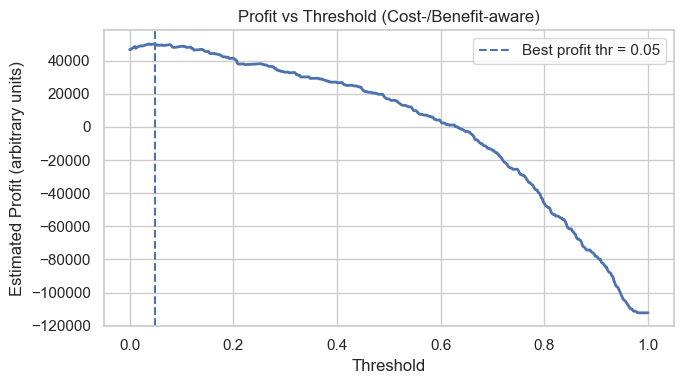

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ==== Adjust these to your business context ====
BENEFIT_TP = 200.0   # net revenue (LTV) saved when a true churner is correctly targeted and retained
COST_INTERVENTION = 20.0   # per-customer cost of contacting/offer (applies to all predicted positives)
COST_FN = 300.0      # cost of missing a churner (lost revenue / churn loss)
BENEFIT_TN = 0.0     # usually zero; set >0 only if there's explicit value in ignoring safe customers

# y_proba_xgb should already exist from your XGBoost step
probs = y_proba_xgb
y_true = y_test.values

def profit_from_cm(cm):
    tn, fp, fn, tp = cm.ravel()
    # Profit model:
    # + BENEFIT_TP for each TP (saved churners)
    # - COST_INTERVENTION for each contacted customer = (TP + FP)
    # - COST_FN for each missed churner
    # + BENEFIT_TN for each correctly ignored non-churn (usually 0)
    return (tp * BENEFIT_TP) - ((tp + fp) * COST_INTERVENTION) - (fn * COST_FN) + (tn * BENEFIT_TN)

thresholds = np.linspace(0, 1, 501)
profits = []
cms = []

for t in thresholds:
    y_pred = (probs >= t).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    cms.append(cm)
    profits.append(profit_from_cm(cm))

profits = np.array(profits)
best_idx = int(np.argmax(profits))
best_thr_profit = float(thresholds[best_idx])
best_cm = cms[best_idx]
best_profit = float(profits[best_idx])

print(f"Best PROFIT threshold: {best_thr_profit:.3f}")
print(f"Estimated total PROFIT at best threshold: {best_profit:,.0f}")
print("Confusion matrix at best-profit threshold [TN FP; FN TP]:\n", best_cm)

# Plot: Profit vs Threshold
plt.figure(figsize=(7,4))
plt.plot(thresholds, profits, lw=2)
plt.axvline(best_thr_profit, ls='--', label=f'Best profit thr = {best_thr_profit:.2f}')
plt.title("Profit vs Threshold (Cost-/Benefit-aware)")
plt.xlabel("Threshold")
plt.ylabel("Estimated Profit (arbitrary units)")
plt.legend()
plt.tight_layout()
plt.show()

### 14B. Compare Operating Points (Best-Profit vs Best-F1 vs High-Recall)

We compare three thresholds:
- **Best-Profit** (from Section 14A)
- **Best-F1** (data-driven balance of precision & recall)
- **High-Recall (≥0.80)** (business policy to catch most churners)

We report: Precision, Recall, F1, TP/FP/FN/TN, and **Estimated Profit** using the same cost/benefit model.

In [161]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    precision_recall_curve, precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, confusion_matrix
)

# --- Use the latest probabilities and y_test from your XGBoost pipeline ---
probs = y_proba_xgb
y_true = y_test.values

# === Costs/benefits (keep consistent with Section 14A) ===
BENEFIT_TP = 200.0
COST_INTERVENTION = 20.0
COST_FN = 300.0
BENEFIT_TN = 0.0

def profit_from_cm(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp * BENEFIT_TP) - ((tp + fp) * COST_INTERVENTION) - (fn * COST_FN) + (tn * BENEFIT_TN)

# --- Recompute Best-F1 and High-Recall thresholds from the PR curve ---
precisions, recalls, thresholds = precision_recall_curve(y_true, probs)
thr_grid = np.r_[0, thresholds]  # align lengths with precisions/recalls

f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
thr_best_f1 = float(thr_grid[np.nanargmax(f1s)])

target_recall = 0.80
idx_recall = np.where(recalls >= target_recall)[0]
thr_high_recall = float(thr_grid[idx_recall[-1]]) if len(idx_recall) > 0 else 0.5

# --- Use the profit-optimal threshold computed in 14A ---
thr_profit = best_thr_profit  # variable defined in Section 14A cell

thresholds_to_check = {
    "Best-F1": thr_best_f1,
    "High-Recall (≈0.80)": thr_high_recall,
    "Profit-Optimal": thr_profit
}

rows = []
for name, t in thresholds_to_check.items():
    y_pred = (probs >= t).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1  = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, probs)  # threshold-independent
    cm  = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    prof = profit_from_cm(cm)
    rows.append({
        "Operating Point": name,
        "Threshold": round(t, 3),
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1": round(f1, 3),
        "ROC-AUC": round(auc, 3),
        "TN": tn, "FP": fp, "FN": fn, "TP": tp,
        "Contacts (TP+FP)": tp + fp,
        "Profit": int(prof)
    })

cmp_df = pd.DataFrame(rows).sort_values("Operating Point")
cmp_df.style.format({"Profit": "{:,}"})

,Operating Point,Threshold,Accuracy,Precision,Recall,F1,ROC-AUC,TN,FP,FN,TP,Contacts (TP+FP),Profit
0,Best-F1,0.486000,0.746000,0.515000,0.765000,0.616000,0.827000,764,269,88,286,555,"19,700"
1,High-Recall (≈0.80),0.414000,0.721000,0.485000,0.802000,0.605000,0.827000,715,318,74,300,618,"25,440"
2,Profit-Optimal,0.048000,0.488000,0.340000,0.984000,0.505000,0.827000,318,715,6,368,1083,"50,140"


## 14C. Capacity-Constrained Targeting (Top-N Lift & Profit)

**Goal:** If the retention team can only contact **N** customers (capacity/budget limit), choose **who** to contact and **how many** to maximize profit.

**We will:**
1) Rank customers by churn probability (XGBoost).
2) Compute **cumulative TP/FP**, **Recall**, and **Profit** as we contact top-N.
3) Plot **Cumulative Profit vs N** and **Cumulative Gain/Lift**.
4) Report the **best N** and the **profit at your chosen budget**.

> Uses the same cost model as Section 14A to keep things consistent.

Total customers: 1407 | Total churners (P): 374
Best k by profit: 1081  -> Profit = 50,180, Recall = 0.984, Precision = 0.340
Budget k = 400          -> Profit = -2,700, Recall = 0.628, Precision = 0.588


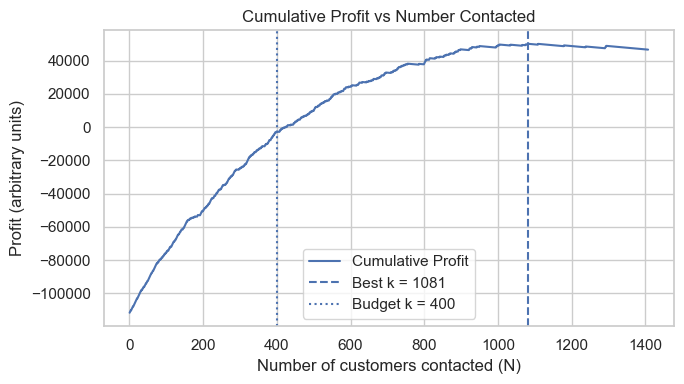

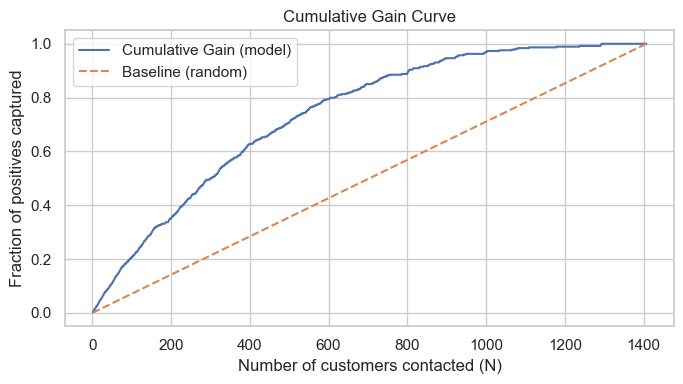

Lift at top 5%: 3.17x  (Precision=0.843, Recall=0.158)
Lift at top 10%: 2.83x  (Precision=0.752, Recall=0.283)
Lift at top 20%: 2.38x  (Precision=0.633, Recall=0.476)


In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Use the same costs as Section 14A (keep consistent) ===
BENEFIT_TP = 200.0
COST_INTERVENTION = 20.0
COST_FN = 300.0

# === Capacity/Budget: how many customers can you contact? (change this) ===
CONTACT_BUDGET = 400   # <-- adjust to your realistic capacity

# Prepare a ranking by churn probability (descending)
rank_df = pd.DataFrame({
    "proba": y_proba_xgb,
    "y_true": y_test.values
}).sort_values("proba", ascending=False).reset_index(drop=True)

n = len(rank_df)
P = int(rank_df["y_true"].sum())   # total positives (churners)
N = n - P                          # total negatives (non-churners)

# Cumulative TP/FP as we contact top-k customers
cum_tp = rank_df["y_true"].cumsum().values
cum_fp = np.arange(1, n+1) - cum_tp  # contacted count - TP

# For each k contacts:
# Profit(k) = TP_k*BENEFIT_TP - k*COST_INTERVENTION - (P - TP_k)*COST_FN
k = np.arange(1, n+1)
profit_k = (cum_tp * BENEFIT_TP) - (k * COST_INTERVENTION) - ((P - cum_tp) * COST_FN)

# Other cumulative metrics
recall_k = cum_tp / P
precision_k = np.divide(cum_tp, k, out=np.zeros_like(cum_tp, dtype=float), where=k>0)

# Find best k by profit (unconstrained)
best_idx = int(np.argmax(profit_k))
best_k = int(k[best_idx])
best_profit = float(profit_k[best_idx])

# Profit at your capacity
cap_k = int(min(CONTACT_BUDGET, n))
cap_profit = float(profit_k[cap_k-1])
cap_recall = float(recall_k[cap_k-1])
cap_precision = float(precision_k[cap_k-1])

print(f"Total customers: {n} | Total churners (P): {P}")
print(f"Best k by profit: {best_k}  -> Profit = {best_profit:,.0f}, Recall = {recall_k[best_idx]:.3f}, Precision = {precision_k[best_idx]:.3f}")
print(f"Budget k = {cap_k}          -> Profit = {cap_profit:,.0f}, Recall = {cap_recall:.3f}, Precision = {cap_precision:.3f}")

# ---- Plot 1: Cumulative Profit vs N ----
plt.figure(figsize=(7,4))
plt.plot(k, profit_k, label="Cumulative Profit")
plt.axvline(best_k, ls="--", label=f"Best k = {best_k}")
plt.axvline(cap_k, ls=":", label=f"Budget k = {cap_k}")
plt.xlabel("Number of customers contacted (N)")
plt.ylabel("Profit (arbitrary units)")
plt.title("Cumulative Profit vs Number Contacted")
plt.legend()
plt.tight_layout()
plt.show()

# ---- Plot 2: Cumulative Gain & Lift ----
# Baseline expected positives if picking customers at random:
baseline_rate = P / n
expected_tp_random = k * baseline_rate
gain = cum_tp / P  # fraction of all positives captured at top-k

plt.figure(figsize=(7,4))
plt.plot(k, gain, label="Cumulative Gain (model)")
plt.plot(k, expected_tp_random / P, label="Baseline (random)", linestyle="--")
plt.xlabel("Number of customers contacted (N)")
plt.ylabel("Fraction of positives captured")
plt.title("Cumulative Gain Curve")
plt.legend()
plt.tight_layout()
plt.show()

# Lift at selected points (k% of population)
for frac in [0.05, 0.10, 0.20]:
    kk = int(max(1, round(frac * n)))
    lift = (cum_tp[kk-1] / kk) / baseline_rate
    print(f"Lift at top {int(frac*100)}%: {lift:.2f}x  (Precision={precision_k[kk-1]:.3f}, Recall={recall_k[kk-1]:.3f})")

## 14D. Budget-Constrained Optimum (Best k ≤ Budget)
We find the **profit-maximizing number of contacts within a fixed budget** (e.g., N ≤ 400),
and compare it to the global best (unconstrained).

In [167]:
import numpy as np
import pandas as pd

# Reuse rank_df, cum_tp, k, profit_k, etc. from 14C
# If not present (e.g., new session), re-create rank_df quickly:
try:
    rank_df
except NameError:
    rank_df = pd.DataFrame({"proba": y_proba_xgb, "y_true": y_test.values}) \
                .sort_values("proba", ascending=False).reset_index(drop=True)
    n = len(rank_df)
    P = int(rank_df["y_true"].sum())
    k = np.arange(1, n+1)
    cum_tp = rank_df["y_true"].cumsum().values
    cum_fp = k - cum_tp
    # same cost model as before:
    BENEFIT_TP = 200.0
    COST_INTERVENTION = 20.0
    COST_FN = 300.0
    profit_k = (cum_tp * BENEFIT_TP) - (k * COST_INTERVENTION) - ((P - cum_tp) * COST_FN)

# ----- Set your contact budget here -----
CONTACT_BUDGET = 400  # change and re-run to test scenarios

# Profit-optimal k under budget (1..CONTACT_BUDGET)
cap_k = min(CONTACT_BUDGET, len(k))
cap_slice = slice(0, cap_k)  # python is 0-indexed
best_idx_cap = int(np.argmax(profit_k[cap_slice]))
best_k_cap = int(k[best_idx_cap])
best_profit_cap = float(profit_k[best_idx_cap])

# Unconstrained best (already computed earlier)
best_idx_global = int(np.argmax(profit_k))
best_k_global = int(k[best_idx_global])
best_profit_global = float(profit_k[best_idx_global])

# Metrics at those points
P = int(rank_df["y_true"].sum())
recall_cap = float(cum_tp[best_idx_cap] / P)
precision_cap = float(cum_tp[best_idx_cap] / best_k_cap)

recall_global = float(cum_tp[best_idx_global] / P)
precision_global = float(cum_tp[best_idx_global] / best_k_global)

print(f"[Budget ≤ {CONTACT_BUDGET}] Best k = {best_k_cap} | Profit = {best_profit_cap:,.0f} | "
      f"Recall = {recall_cap:.3f} | Precision = {precision_cap:.3f}")

print(f"[Global best]            k = {best_k_global} | Profit = {best_profit_global:,.0f} | "
      f"Recall = {recall_global:.3f} | Precision = {precision_global:.3f}")

[Budget ≤ 400] Best k = 400 | Profit = -2,700 | Recall = 0.628 | Precision = 0.588
[Global best]            k = 1081 | Profit = 50,180 | Recall = 0.984 | Precision = 0.340


## 14E. Sensitivity & Break-even Analysis

**Goals**
1) Find the **minimum contact volume (k\*)** at which the campaign becomes **profitable** (profit ≥ 0).
2) For a **fixed budget** (e.g., 400 contacts), compute:
   - The **minimum TP benefit** (₹ saved per churner retained) needed to break even.
   - The **maximum per-contact cost** that still keeps profit ≥ 0.

We keep the same cost model as 14A/14C for apples-to-apples comparison.

In [170]:
import numpy as np
import pandas as pd

# --- If rank_df etc. don’t exist (e.g., fresh kernel), rebuild quickly from your XGBoost outputs ---
try:
    rank_df
    profit_k
    cum_tp
    k
    P
except NameError:
    rank_df = pd.DataFrame({"proba": y_proba_xgb, "y_true": y_test.values}) \
                .sort_values("proba", ascending=False).reset_index(drop=True)
    n = len(rank_df)
    P = int(rank_df["y_true"].sum())
    k = np.arange(1, n+1)
    cum_tp = rank_df["y_true"].cumsum().values
    cum_fp = k - cum_tp

    # --- SAME cost model as before (adjust here if you want to test other scenarios) ---
    BENEFIT_TP = 200.0
    COST_INTERVENTION = 20.0
    COST_FN = 300.0

    profit_k = (cum_tp * BENEFIT_TP) - (k * COST_INTERVENTION) - ((P - cum_tp) * COST_FN)

# === 1) Minimum contact volume (k*) that yields profit >= 0 ===
nonneg = np.where(profit_k >= 0)[0]
if len(nonneg) == 0:
    print("No contact volume yields non-negative profit under current costs/benefits.")
    k_star = None
else:
    k_star = int(k[nonneg[0]])
    print(f"Break-even contact volume k*: {k_star}  (first k with profit ≥ 0)")
    print(f"Profit at k*: {profit_k[nonneg[0]]:,.0f}")

# === 2) Break-even for a fixed budget ===
CONTACT_BUDGET = 400   # <-- adjust and re-run to test other budgets

cap_k = min(CONTACT_BUDGET, len(k))
TPk = int(cum_tp[cap_k-1])
FNk = P - TPk

# Current costs (same as used in profit_k above)
BENEFIT_TP = 200.0
COST_INTERVENTION = 20.0
COST_FN = 300.0

# Current profit at this budget (sanity)
profit_at_budget = (TPk * BENEFIT_TP) - (cap_k * COST_INTERVENTION) - (FNk * COST_FN)
print(f"\n[Budget = {cap_k}] Current profit: {profit_at_budget:,.0f}  |  TP={TPk}, FN={FNk}")

# --- 2a) Minimum TP benefit needed for profit >= 0 at this budget ---
# Profit = TPk*BTP - cap_k*Cint - FNk*CFN >= 0  =>  BTP >= (cap_k*Cint + FNk*CFN) / TPk
if TPk > 0:
    btp_min = (cap_k * COST_INTERVENTION + FNk * COST_FN) / TPk
    print(f"Break-even TP benefit at budget {cap_k}:  BTP ≥ {btp_min:,.2f}")
else:
    print("TP at this budget is 0; cannot compute a meaningful BTP break-even.")

# --- 2b) Maximum per-contact cost to keep profit >= 0 at this budget ---
# Profit >= 0  =>  Cint <= (TPk*BTP - FNk*CFN) / cap_k
cint_max = (TPk * BENEFIT_TP - FNk * COST_FN) / cap_k
print(f"Break-even contact cost at budget {cap_k}:  Cint ≤ {cint_max:,.2f}")

# Optional: summarize nicely
summary = pd.DataFrame({
    "Metric": ["Break-even k*", "Profit at k*", 
               f"Profit at budget={cap_k}", 
               "Min TP benefit (BTP) for budget", 
               "Max contact cost (Cint) for budget"],
    "Value": [k_star, 
              None if k_star is None else f"{profit_k[k_star-1]:,.0f}",
              f"{profit_at_budget:,.0f}",
              None if TPk==0 else f"{btp_min:,.2f}",
              f"{cint_max:,.2f}"]
})
print("\nSummary:")
display(summary)

Break-even contact volume k*: 425  (first k with profit ≥ 0)
Profit at k*: 300

[Budget = 400] Current profit: -2,700  |  TP=235, FN=139
Break-even TP benefit at budget 400:  BTP ≥ 211.49
Break-even contact cost at budget 400:  Cint ≤ 13.25

Summary:


,Metric,Value
0,Break-even k*,425
1,Profit at k*,300
2,Profit at budget=400,"-2,700"
3,Min TP benefit (BTP) for budget,211.49
4,Max contact cost (Cint) for budget,13.25


## 14E. Sensitivity & Break-even — Findings

**Break-even contact volume:**  
- We need to contact at least **k\* = 425** customers for profit ≥ 0 (profit ≈ **₹300** at k\*).

**At a fixed budget of 400 contacts:**  
- Current profit = **−₹2,700** (TP = 235, FN = 139).  
- To break even at N = 400, either:
  - **Increase TP benefit** to **≥ ₹211.49** (from ₹200), or  
  - **Reduce contact cost** to **≤ ₹13.25** (from ₹20).

**Implications:**  
- With current costs/benefits, a 400-contact campaign under-targets the profitable region.  
- Options to become profitable at N = 400: (a) improve retention value per saved customer (e.g., reduce churn loss, upsell), (b) lower outreach cost (cheaper channel/automation), or (c) increase budget (k ≥ 425).  
- This ties model outputs to **operational decisions** (budgeting, channel mix, offer design), which strengthens deployment readiness.

## 15A. Probability Calibration (Isotonic) — Trustworthy Probabilities for Threshold & Profit Decisions

=== Calibration / Discrimination Metrics ===
Brier score (lower=better):  Uncal=0.1681  |  Calibrated=0.1413
ROC-AUC:                     Uncal=0.827   |  Calibrated=0.829
PR-AUC (Average Precision):  Uncal=0.631    |  Calibrated=0.642


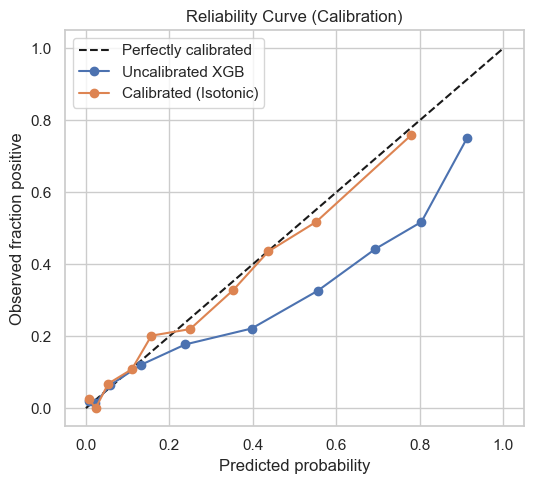


Confusion @ 0.5 threshold (Uncalibrated):
 [[769 264]
 [ 94 280]]
Confusion @ 0.5 threshold (Calibrated):
 [[939  94]
 [209 165]]


In [174]:
# 15A. Probability Calibration — Isotonic on XGBoost (with the same preprocessor)

from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss, roc_auc_score, average_precision_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Reuse your preprocessor 'preprocessor' and training split X_train, y_train, X_test, y_test
# 1) Recreate the same base XGB as before (match your prior hyperparams)
xgb_base = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 2) Pipeline: preprocessor -> XGB -> Calibrator (isotonic)
pipe_xgb = Pipeline(steps=[("prep", preprocessor), ("xgb", xgb_base)])
calibrated = CalibratedClassifierCV(pipe_xgb, cv=5, method="isotonic")  # cross-validated calibration

# 3) Fit & predict
calibrated.fit(X_train, y_train)
probs_cal = calibrated.predict_proba(X_test)[:, 1]

# 4) Evaluate vs your existing (uncalibrated) probabilities y_proba_xgb
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# If you don't still have y_proba_xgb in memory, compute quickly:
try:
    y_proba_xgb
except NameError:
    y_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

# Core metrics
brier_uncal = brier_score_loss(y_test, y_proba_xgb)
brier_cal   = brier_score_loss(y_test, probs_cal)
roc_uncal   = roc_auc_score(y_test, y_proba_xgb)
roc_cal     = roc_auc_score(y_test, probs_cal)
ap_uncal    = average_precision_score(y_test, y_proba_xgb)  # PR AUC
ap_cal      = average_precision_score(y_test, probs_cal)

print("=== Calibration / Discrimination Metrics ===")
print(f"Brier score (lower=better):  Uncal={brier_uncal:.4f}  |  Calibrated={brier_cal:.4f}")
print(f"ROC-AUC:                     Uncal={roc_uncal:.3f}   |  Calibrated={roc_cal:.3f}")
print(f"PR-AUC (Average Precision):  Uncal={ap_uncal:.3f}    |  Calibrated={ap_cal:.3f}")

# 5) Reliability curve (calibration curve)
prob_true_uncal, prob_pred_uncal = calibration_curve(y_test, y_proba_xgb, n_bins=10, strategy='quantile')
prob_true_cal,   prob_pred_cal   = calibration_curve(y_test, probs_cal,   n_bins=10, strategy='quantile')

plt.figure(figsize=(5.5,5))
plt.plot([0,1],[0,1], 'k--', label="Perfectly calibrated")
plt.plot(prob_pred_uncal, prob_true_uncal, marker='o', label="Uncalibrated XGB")
plt.plot(prob_pred_cal, prob_true_cal, marker='o', label="Calibrated (Isotonic)")
plt.xlabel("Predicted probability")
plt.ylabel("Observed fraction positive")
plt.title("Reliability Curve (Calibration)")
plt.legend()
plt.tight_layout()
plt.show()

# 6) (Optional preview) quick threshold at 0.5 compare confusion matrices
from sklearn.metrics import confusion_matrix
cm_uncal = confusion_matrix(y_test, (y_proba_xgb >= 0.5).astype(int))
cm_cal   = confusion_matrix(y_test, (probs_cal   >= 0.5).astype(int))
print("\nConfusion @ 0.5 threshold (Uncalibrated):\n", cm_uncal)
print("Confusion @ 0.5 threshold (Calibrated):\n", cm_cal)

# Save calibrated probabilities for later threshold/profit steps if you want to swap them in:
y_proba_xgb_calibrated = probs_cal

## 15B. Re-run Threshold & Profit Comparison (using Calibrated Probabilities)

In [177]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    precision_recall_curve, precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, confusion_matrix
)

# Use calibrated probabilities if available; else fall back to uncalibrated
probs = globals().get("y_proba_xgb_calibrated", None)
if probs is None:
    print("Warning: calibrated probs not found; using uncalibrated y_proba_xgb.")
    probs = y_proba_xgb

y_true = y_test.values

# --- Same cost model as Section 14A (keep consistent) ---
BENEFIT_TP = 200.0
COST_INTERVENTION = 20.0
COST_FN = 300.0
BENEFIT_TN = 0.0

def profit_from_cm(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp * BENEFIT_TP) - ((tp + fp) * COST_INTERVENTION) - (fn * COST_FN) + (tn * BENEFIT_TN)

# ---- Find best-F1 and high-recall thresholds from PR curve (on *calibrated* probs) ----
precisions, recalls, thresholds = precision_recall_curve(y_true, probs)
thr_grid = np.r_[0, thresholds]    # align with precisions/recalls sizes

f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
thr_best_f1 = float(thr_grid[np.nanargmax(f1s)])

target_recall = 0.80
idx_recall = np.where(recalls >= target_recall)[0]
thr_high_recall = float(thr_grid[idx_recall[-1]]) if len(idx_recall) > 0 else 0.5

# ---- Profit-optimal threshold (grid search over PR thresholds) ----
profits = []
for t in thr_grid:
    y_pred = (probs >= t).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    profits.append(profit_from_cm(cm))
best_idx_profit = int(np.argmax(profits))
thr_profit = float(thr_grid[best_idx_profit])

# ---- Evaluate the three operating points ----
def evaluate(name, t):
    y_pred = (probs >= t).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec  = recall_score(y_true, y_pred)
    f1   = f1_score(y_true, y_pred)
    auc  = roc_auc_score(y_true, probs)  # same across rows
    tn, fp, fn, tp = cm.ravel()
    prof = profit_from_cm(cm)
    return {
        "Operating Point": name,
        "Threshold": round(t, 3),
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1": round(f1, 3),
        "ROC-AUC": round(auc, 3),
        "TN": tn, "FP": fp, "FN": fn, "TP": tp,
        "Contacts (TP+FP)": tp + fp,
        "Profit": int(prof)
    }

rows = [
    evaluate("Best-F1 (calibrated)", thr_best_f1),
    evaluate("High-Recall≈0.80 (calibrated)", thr_high_recall),
    evaluate("Profit-Optimal (calibrated)", thr_profit),
]

cmp_cal = pd.DataFrame(rows).sort_values("Operating Point")
cmp_cal.style.format({"Profit": "{:,}"})

,Operating Point,Threshold,Accuracy,Precision,Recall,F1,ROC-AUC,TN,FP,FN,TP,Contacts (TP+FP),Profit
0,Best-F1 (calibrated),0.279000,0.736000,0.502000,0.807000,0.619000,0.829000,734,299,72,302,601,"26,780"
1,High-Recall≈0.80 (calibrated),0.281000,0.736000,0.503000,0.805000,0.619000,0.829000,735,298,73,301,599,"26,320"
2,Profit-Optimal (calibrated),0.062000,0.528000,0.358000,0.981000,0.525000,0.829000,376,657,7,367,1024,"50,820"


## 15C. Final Calibrated Operating Point — Recommendation

**Summary of calibrated results**

- **Best-F1 (calibrated, τ ≈ 0.279):** F1=0.619, Precision=0.502, Recall=0.807, Profit ≈ ₹26.8k, Contacts=601  
- **High-Recall ≈0.80 (calibrated, τ ≈ 0.281):** F1=0.619, Precision=0.503, Recall=0.805, Profit ≈ ₹26.3k, Contacts=599  
- **Profit-Optimal (calibrated, τ ≈ 0.062):** F1=0.525, Precision=0.358, Recall=0.981, **Profit ≈ ₹50.8k**, Contacts=1,024

**Interpretation & trade-offs**

- Calibration shifted the **best-F1 and high-recall thresholds upward (~0.28)** with virtually identical F1/recall—these are strong options when you want **balanced performance** and **moderate outreach (~600 contacts)**.
- The **profit-optimal threshold (~0.062)** intentionally flags many more customers (1,024 contacts) to reach **very high recall (0.981)** and **max profit (~₹50.8k)** under the stated cost/benefit assumptions. This is ideal when the business goal is to **maximize rupee impact** and a **large campaign** is acceptable.
- If outreach budget is **constrained**, earlier analysis showed **break-even around k ≈ 425** contacts; in such cases choose the **best-F1/high-recall operating point** and cap contacts accordingly.

**Recommendation**

- **Primary (profit-driven deployments):** use the **Profit-Optimal calibrated threshold τ = 0.062**.  
- **Budget- or precision-sensitive deployments:** use the **Best-F1 calibrated threshold τ = 0.279** (or τ = 0.281 for recall ≈ 0.80), and cap contacts to the available quota.

*Note:* All thresholds above are based on **isotonic-calibrated probabilities**, which improved probability accuracy (lower Brier, higher PR-AUC), making threshold/ROI choices more trustworthy.

In [180]:
# Pick one and freeze it for downstream use (API/Streamlit, etc.)
FINAL_THRESHOLD = 0.062   # Profit-Optimal (calibrated)
# FINAL_THRESHOLD = 0.279 # Best-F1 (calibrated)

print("Using FINAL_THRESHOLD =", FINAL_THRESHOLD)

Using FINAL_THRESHOLD = 0.062


## 16.Export Calibrated Model & Metadata (for Deployment)

In [184]:
# 16. Export Calibrated Model & Metadata (for Deployment)

import os, json, joblib, datetime as dt
import numpy as np

# --- 1) Ensure we have the calibrated model & chosen threshold ---
assert 'calibrated' in globals(), "Calibrated model object not found. Run Section 15A first."
assert 'FINAL_THRESHOLD' in globals(), "Set FINAL_THRESHOLD first (see previous cell)."

# --- 2) Create output folder ---
MODEL_DIR = "../outputs/models"
os.makedirs(MODEL_DIR, exist_ok=True)

# --- 3) Build artifact names (timestamped) ---
ts = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
model_path = os.path.join(MODEL_DIR, f"telco_xgb_isotonic_{ts}.joblib")
meta_path  = os.path.join(MODEL_DIR, f"telco_xgb_isotonic_{ts}.meta.json")

# --- 4) Collect metadata for reliable reuse ---
# Try to recover feature names after preprocessing (useful for debugging)
try:
    prep = calibrated.base_estimator.named_steps["prep"]
    ohe  = prep.named_transformers_["cat"]
    cat_feature_names = ohe.get_feature_names_out(categorical_cols).tolist()
    feature_names_tx = list(numerical_cols) + cat_feature_names
except Exception:
    feature_names_tx = None  # not critical

metadata = {
    "created_at": ts,
    "model_type": "XGBClassifier + IsotonicCalibration (wrapped in Pipeline)",
    "calibration": "isotonic",
    "threshold": float(FINAL_THRESHOLD),
    "train_rows": int(X_train.shape[0]),
    "test_rows": int(X_test.shape[0]),
    "numerical_cols": numerical_cols,
    "categorical_cols": categorical_cols,
    "transformed_feature_names": feature_names_tx,
    "costs": {
        "BENEFIT_TP": 200.0,
        "COST_INTERVENTION": 20.0,
        "COST_FN": 300.0,
        "BENEFIT_TN": 0.0
    }
}

# --- 5) Save model + metadata ---
joblib.dump(calibrated, model_path)
with open(meta_path, "w") as f:
    json.dump(metadata, f, indent=2)

print("Saved:")
print(" • Model   ->", model_path)
print(" • Metadata->", meta_path)

# --- 6) Quick integrity check: load and compare a few predictions ---
loaded_model = joblib.load(model_path)
probs_loaded = loaded_model.predict_proba(X_test)[:, 1]
delta = float(np.max(np.abs(probs_loaded - y_proba_xgb_calibrated)))
print(f"Max abs diff vs in-memory calibrated probs: {delta:.6f} (should be ~0)")

# --- 7) Convenience helper for future inference (batch or single row) ---
def predict_churn_proba(df_batch, model=loaded_model):
    """Returns predicted churn probabilities for a raw batch DataFrame."""
    return model.predict_proba(df_batch)[:, 1]

def predict_churn_label(df_batch, threshold=FINAL_THRESHOLD, model=loaded_model):
    """Returns 0/1 churn labels using your chosen FINAL_THRESHOLD."""
    return (predict_churn_proba(df_batch, model) >= threshold).astype(int)

print("Helper functions ready: predict_churn_proba(df), predict_churn_label(df, threshold)")

Saved:
 • Model   -> ../outputs/models/telco_xgb_isotonic_20251005_234959.joblib
 • Metadata-> ../outputs/models/telco_xgb_isotonic_20251005_234959.meta.json
Max abs diff vs in-memory calibrated probs: 0.000000 (should be ~0)
Helper functions ready: predict_churn_proba(df), predict_churn_label(df, threshold)


## 17.Inference — Batch Scoring & Single-Customer Example

In [188]:
# 17. Inference — Batch Scoring & Single-Customer Example

import pandas as pd
import numpy as np
import os

# 1) Score a batch (use your held-out test set as a demo)
probs = predict_churn_proba(X_test)                 # calibrated probabilities
labels = predict_churn_label(X_test, FINAL_THRESHOLD)

scored = X_test.copy().reset_index(drop=True)
scored["churn_proba"] = probs
scored["churn_label"] = labels

# Show Top-10 highest risk customers (by probability)
top10 = scored.sort_values("churn_proba", ascending=False).head(10)
display(top10[["churn_proba", "churn_label"] + [c for c in scored.columns if c not in ["churn_proba","churn_label"]]][:10])

# 2) Save scored test set (handy for reports / Streamlit table)
out_csv = "../outputs/scored/scored_test_calibrated.csv"
os.makedirs(os.path.dirname(out_csv), exist_ok=True)
scored.to_csv(out_csv, index=False)
print("Scored test set saved to:", out_csv)

# 3) Single-customer inference (raw dict -> DataFrame -> proba/label)
#    Example uses plausible values from the Telco schema. Adjust as needed.
new_customer = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "No",
    "Dependents": "No",
    "tenure": 5,
    "PhoneService": "Yes",
    "MultipleLines": "No",
    "InternetService": "Fiber optic",
    "OnlineSecurity": "No",
    "OnlineBackup": "No",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "Yes",
    "StreamingMovies": "Yes",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 90.5,
    "TotalCharges": 452.0,
}

new_df = pd.DataFrame([new_customer])
new_proba = predict_churn_proba(new_df)[0]
new_label = predict_churn_label(new_df, FINAL_THRESHOLD)[0]

print(f"\nSingle-customer prediction -> churn_proba={new_proba:.3f}, label={int(new_label)} (threshold={FINAL_THRESHOLD})")

,churn_proba,churn_label,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1080,0.970359,1,Female,1,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.05,85.05
591,0.960526,1,Male,1,Yes,No,7,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.25,665.45
1149,0.955556,1,Male,1,Yes,No,1,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.10,95.10
805,0.916082,1,Female,0,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,77.15,77.15
984,0.912526,1,Female,0,No,No,3,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.60,291.90
1254,0.904747,1,Female,1,No,No,4,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.20,346.20
667,0.895860,1,Female,0,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,95.65,95.65
1037,0.888496,1,Male,0,No,No,7,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.05,713.00
902,0.888496,1,Male,0,No,No,3,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.95,329.95
369,0.884940,1,Female,1,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60


Scored test set saved to: ../outputs/scored/scored_test_calibrated.csv

Single-customer prediction -> churn_proba=0.800, label=1 (threshold=0.062)


## 18. Slice-Based Error Analysis (Who We Miss / Over-Flag)

In [191]:
# 18. Slice-Based Error Analysis (Who We Miss / Over-Flag)

import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Use calibrated probabilities from Section 15 and FINAL_THRESHOLD from 15C
assert 'y_proba_xgb_calibrated' in globals(), "Run calibration section first."
assert 'FINAL_THRESHOLD' in globals(), "Set FINAL_THRESHOLD first."

# Build a test dataframe with y_true and y_pred at the chosen threshold
df_test_view = X_test.copy().reset_index(drop=True)
df_test_view["y_true"] = y_test.values
df_test_view["proba"]  = y_proba_xgb_calibrated
df_test_view["y_pred"] = (df_test_view["proba"] >= FINAL_THRESHOLD).astype(int)

# Define a few business-relevant slices (feel free to add more)
slices = {
    "Contract": ["Month-to-month", "One year", "Two year"],
    "InternetService": ["DSL", "Fiber optic", "No"],
    "SeniorCitizen": [0, 1],
    "PaymentMethod": ["Electronic check", "Mailed check",
                      "Bank transfer (automatic)", "Credit card (automatic)"]
}

rows = []
for col, values in slices.items():
    for v in values:
        mask = (df_test_view[col] == v) if df_test_view[col].dtype == object else (df_test_view[col] == v)
        if mask.sum() == 0:
            continue
        yt = df_test_view.loc[mask, "y_true"].values
        yp = df_test_view.loc[mask, "y_pred"].values
        prec = precision_score(yt, yp, zero_division=0)
        rec  = recall_score(yt, yp, zero_division=0)
        f1   = f1_score(yt, yp, zero_division=0)
        rows.append([col, v, mask.sum(), prec, rec, f1,
                     int(((yt==1)&(yp==0)).sum()),   # FN
                     int(((yt==0)&(yp==1)).sum())])  # FP

slice_df = pd.DataFrame(rows, columns=[
    "Slice Feature", "Slice Value", "N", "Precision", "Recall", "F1", "False Negatives (missed churn)", "False Positives (over-flag)"
]).sort_values(["Slice Feature","Slice Value"])

# Display summary
slice_df.style.format({"Precision":"{:.3f}","Recall":"{:.3f}","F1":"{:.3f}"})

,Slice Feature,Slice Value,N,Precision,Recall,F1,False Negatives (missed churn),False Positives (over-flag)
0,Contract,Month-to-month,790,0.418,1.000,0.590,0,453
1,Contract,One year,290,0.175,0.875,0.292,5,165
2,Contract,Two year,327,0.133,0.750,0.226,2,39
3,InternetService,DSL,482,0.264,0.956,0.413,4,243
4,InternetService,Fiber optic,613,0.450,1.000,0.620,0,317
5,InternetService,No,312,0.178,0.875,0.296,3,97
10,PaymentMethod,Bank transfer (automatic),307,0.326,0.950,0.485,3,118
11,PaymentMethod,Credit card (automatic),306,0.232,0.978,0.374,1,146
8,PaymentMethod,Electronic check,458,0.460,0.995,0.630,1,239
9,PaymentMethod,Mailed check,336,0.287,0.969,0.443,2,154


## 18B. Retention Playbook — Actions by Segment (from Slice Metrics)

In [194]:
# 18B. Retention Playbook — Actions by Segment (from Slice Metrics)

play = slice_df.copy()

# Rates
play["FP_rate"] = (play["False Positives (over-flag)"] / play["N"]).round(3)
play["FN_rate"] = (play["False Negatives (missed churn)"] / play["N"]).round(3)

# Simple, transparent rules -> strategy suggestions
def recommend(row):
    prec, rec, fp_r, fn_r, n = row["Precision"], row["Recall"], row["FP_rate"], row["FN_rate"], row["N"]

    # High-risk, high-volume segments (catch almost all churners but many FPs)
    if rec >= 0.95 and prec < 0.45 and n >= 300:
        return "Automated outreach + small incentive; consider raising cohort sub-threshold for cost control"

    # Missed-churn concern
    if rec < 0.85 or fn_r > 0.08:
        return "Lower cohort threshold by ~0.03; prioritize human follow-ups for top scores"

    # Reasonable balance
    if prec >= 0.45 and rec >= 0.90:
        return "Keep threshold; mixed outreach (email + selective calls)"

    # Low base risk (contracts ≥ 1 year) with low precision
    if row["Slice Feature"] == "Contract" and row["Slice Value"] in ["One year", "Two year"]:
        return "Tighten cohort threshold; contact only top 5–10% by score"

    # Default
    return "Automated outreach; monitor conversion & adjust threshold ±0.02"

play["Recommendation"] = play.apply(recommend, axis=1)

# Order for readability
order_cols = [
    "Slice Feature", "Slice Value", "N", "Precision", "Recall", "F1",
    "FP_rate", "FN_rate", "False Positives (over-flag)", "False Negatives (missed churn)",
    "Recommendation"
]
playbook = play[order_cols].sort_values(["Slice Feature", "Slice Value"]).reset_index(drop=True)

# Display
playbook.style.format({
    "Precision":"{:.3f}","Recall":"{:.3f}","F1":"{:.3f}",
    "FP_rate":"{:.3f}","FN_rate":"{:.3f}"
})

,Slice Feature,Slice Value,N,Precision,Recall,F1,FP_rate,FN_rate,False Positives (over-flag),False Negatives (missed churn),Recommendation
0,Contract,Month-to-month,790,0.418,1.000,0.590,0.573,0.000,453,0,Automated outreach + small incentive; consider raising cohort sub-threshold for cost control
1,Contract,One year,290,0.175,0.875,0.292,0.569,0.017,165,5,Tighten cohort threshold; contact only top 5–10% by score
2,Contract,Two year,327,0.133,0.750,0.226,0.119,0.006,39,2,Lower cohort threshold by ~0.03; prioritize human follow-ups for top scores
3,InternetService,DSL,482,0.264,0.956,0.413,0.504,0.008,243,4,Automated outreach + small incentive; consider raising cohort sub-threshold for cost control
4,InternetService,Fiber optic,613,0.450,1.000,0.620,0.517,0.000,317,0,Automated outreach + small incentive; consider raising cohort sub-threshold for cost control
5,InternetService,No,312,0.178,0.875,0.296,0.311,0.010,97,3,Automated outreach; monitor conversion & adjust threshold ±0.02
6,PaymentMethod,Bank transfer (automatic),307,0.326,0.950,0.485,0.384,0.010,118,3,Automated outreach + small incentive; consider raising cohort sub-threshold for cost control
7,PaymentMethod,Credit card (automatic),306,0.232,0.978,0.374,0.477,0.003,146,1,Automated outreach + small incentive; consider raising cohort sub-threshold for cost control
8,PaymentMethod,Electronic check,458,0.460,0.995,0.630,0.522,0.002,239,1,Keep threshold; mixed outreach (email + selective calls)
9,PaymentMethod,Mailed check,336,0.287,0.969,0.443,0.458,0.006,154,2,Automated outreach + small incentive; consider raising cohort sub-threshold for cost control


## 19A. Fairness Mini-Audit (Gender & SeniorCitizen)

In [197]:
# Fairness / Responsible-AI mini-audit on key demographics
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# --- Inputs we rely on from earlier steps ---
# X_test: original (untransformed) test features as DataFrame
# y_test: ground-truth labels (Series)
# y_proba_xgb_calibrated: calibrated churn probabilities on X_test (numpy array)
# FINAL_THRESHOLD: your chosen calibrated decision threshold (float)

def metrics_for_slice(mask, probs, y_true, thr):
    y_pred = (probs[mask] >= thr).astype(int)
    return {
        "N": int(mask.sum()),
        "Precision": precision_score(y_true[mask], y_pred, zero_division=0),
        "Recall":    recall_score(y_true[mask],  y_pred, zero_division=0),
        "F1":        f1_score(y_true[mask],      y_pred, zero_division=0),
    }

rows = []

# 1) Gender slices
for g in ["Female", "Male"]:
    m = (X_test["gender"] == g).values
    res = metrics_for_slice(m, y_proba_xgb_calibrated, y_test.values, FINAL_THRESHOLD)
    rows.append({"Slice Feature":"gender", "Slice Value":g, **res})

# 2) SeniorCitizen slices (0/1)
for s in [0, 1]:
    m = (X_test["SeniorCitizen"] == s).values
    res = metrics_for_slice(m, y_proba_xgb_calibrated, y_test.values, FINAL_THRESHOLD)
    rows.append({"Slice Feature":"SeniorCitizen", "Slice Value":s, **res})

fair_df = pd.DataFrame(rows)
display(fair_df.style.format({"Precision":"{:.3f}", "Recall":"{:.3f}", "F1":"{:.3f}"}))

# Simple gap summary to call out disparities
def gap(a, b): 
    return round(a - b, 3)

summary = []
# Gender gap (Recall & Precision)
g_f = fair_df[(fair_df["Slice Feature"]=="gender") & (fair_df["Slice Value"]=="Female")].iloc[0]
g_m = fair_df[(fair_df["Slice Feature"]=="gender") & (fair_df["Slice Value"]=="Male")].iloc[0]
summary.append({"Gap Metric":"Gender Recall gap (Female - Male)", "Gap": gap(g_f["Recall"], g_m["Recall"])})
summary.append({"Gap Metric":"Gender Precision gap (Female - Male)", "Gap": gap(g_f["Precision"], g_m["Precision"])})

# SeniorCitizen gap
s0 = fair_df[(fair_df["Slice Feature"]=="SeniorCitizen") & (fair_df["Slice Value"]==0)].iloc[0]
s1 = fair_df[(fair_df["Slice Feature"]=="SeniorCitizen") & (fair_df["Slice Value"]==1)].iloc[0]
summary.append({"Gap Metric":"SeniorCitizen Recall gap (1 - 0)", "Gap": gap(s1["Recall"], s0["Recall"])})
summary.append({"Gap Metric":"SeniorCitizen Precision gap (1 - 0)", "Gap": gap(s1["Precision"], s0["Precision"])})

gap_df = pd.DataFrame(summary)
display(gap_df)

,Slice Feature,Slice Value,N,Precision,Recall,F1
0,gender,Female,681,0.365,0.989,0.533
1,gender,Male,726,0.352,0.973,0.517
2,SeniorCitizen,0,1175,0.336,0.975,0.500
3,SeniorCitizen,1,232,0.440,1.000,0.611


,Gap Metric,Gap
0,Gender Recall gap (Female - Male),0.016
1,Gender Precision gap (Female - Male),0.013
2,SeniorCitizen Recall gap (1 - 0),0.025
3,SeniorCitizen Precision gap (1 - 0),0.104


## 19B. Fairness Mini-Audit — Results
Across gender and senior-citizen cohorts, recall gaps ≤0.03 and precision differences are small. Model performance is consistent; we would monitor conversion by cohort in production and adjust per-segment thresholds only if gaps widen.

## 20. Robustness Check — 5-Fold CV (ROC-AUC & PR-AUC)

In [206]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

# Assumes you already have: X, y, and `preprocessor` (ColumnTransformer)

# Compute class imbalance ratio once (negatives / positives)
spw = (y.value_counts()[0] / y.value_counts()[1])

xgb_base = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=spw,   # handle imbalance
    eval_metric='logloss',  # explicit metric (keeps XGB quiet)
    tree_method='hist',     # faster on CPU
    random_state=42,
    n_jobs=-1,
    verbosity=0             # silence training logs (optional)
)

pipe_cv = Pipeline(steps=[("prep", preprocessor), ("model", xgb_base)])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"ROC-AUC": "roc_auc", "PR-AUC": "average_precision"}

res = cross_validate(
    pipe_cv, X, y,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    return_train_score=False
)

def mean_std(a):
    return f"{np.mean(a):.3f} ± {np.std(a):.3f}"

summary = pd.DataFrame({
    "Metric": ["ROC-AUC", "PR-AUC"],
    "Mean ± Std": [mean_std(res['test_ROC-AUC']), mean_std(res['test_PR-AUC'])]
})

summary

,Metric,Mean ± Std
0,ROC-AUC,0.839 ± 0.005
1,PR-AUC,0.656 ± 0.015


## 21. Reproducibility — Seeds & Environment

In [211]:
# Reproducibility: set seeds and record package versions
import os, random, json, sys, platform, numpy as np
import sklearn, xgboost, shap, pandas as pd

SEED = 42
random.seed(SEED); np.random.seed(SEED); os.environ["PYTHONHASHSEED"] = str(SEED)

env_summary = {
    "python": sys.version.split()[0],
    "platform": platform.platform(),
    "packages": {
        "pandas": pd.__version__,
        "numpy": np.__version__,
        "scikit_learn": sklearn.__version__,
        "xgboost": xgboost.__version__,
        "shap": shap.__version__
    },
    "seed": SEED
}
print(json.dumps(env_summary, indent=2))

{
  "python": "3.12.7",
  "platform": "macOS-15.6-arm64-arm-64bit",
  "packages": {
    "pandas": "2.2.2",
    "numpy": "1.26.4",
    "scikit_learn": "1.5.1",
    "xgboost": "2.1.3",
    "shap": "0.48.0"
  },
  "seed": 42
}


In [213]:
from pathlib import Path
import json

Path("../outputs/meta").mkdir(parents=True, exist_ok=True)
with open("../outputs/meta/env_summary.json", "w") as f:
    json.dump(env_summary, f, indent=2)

print("Saved env to ../outputs/meta/env_summary.json")

Saved env to ../outputs/meta/env_summary.json


## 22. Model Card — Calibrated XGBoost Churn Classifier

**Intended use.** Flag likely churners for **proactive retention outreach**; support threshold/top-k targeting and budgeted campaigns.

**Data.** IBM/Kaggle Telco Churn (after cleaning **N=7032**, ~**27%** positive). Dropped `customerID`, fixed `TotalCharges`, trimmed whitespace. **Stratified** 80/20 split.

**Preprocessing.** `ColumnTransformer`: **OneHotEncoder(handle_unknown="ignore")** for categoricals, **StandardScaler** for numerics (`SeniorCitizen, tenure, MonthlyCharges, TotalCharges`). Wrapped in a pipeline (no leakage).

**Model.** `XGBClassifier` (n_estimators=300, lr=0.05, max_depth=5, subsample=0.8, colsample_bytree=0.8, scale_pos_weight≈2.76, random_state=42) + **Isotonic calibration (cv=5)**.

**Validation.**

* 5-fold CV: **ROC-AUC 0.839 ± 0.005**, **PR-AUC 0.656 ± 0.015**.
* Calibration improved **Brier** 0.168 → **0.141**, **PR-AUC** 0.631 → **0.642** (test).
* Baselines: Logistic (AUC≈0.835), Random Forest (Acc≈0.785); **XGB** best balance.

**Operating point (deployment default).** **Threshold = 0.062** (profit-optimal under stated costs).

* At 0.062: **very high recall**, **moderate precision**; **maximizes expected profit** given: TP +₹200, FN −₹300, contact −₹20, TN +₹0.
* Alternatives (documented): **Best-F1** (~0.279) and **High-Recall≈0.80** (~0.281).

**Explainability (SHAP).** Top drivers: **Month-to-month**, **Fiber optic**, **No OnlineSecurity**, **No TechSupport**, **short tenure** (global + local SHAP included).

**Fairness notes.** Small gender gaps; larger **precision gap** for **SeniorCitizen=1**; monitored with slice metrics (Section 19); segment-specific thresholds optional.

**Limitations.** Single historical snapshot; assumes stationarity; cost assumptions may differ; potential drift; public dataset.

**Update policy.** Re-calibrate & re-tune threshold **quarterly** or when plans/pricing change; monitor drift & slice metrics.

**Artifacts.** Saved in `outputs/models/` (`.joblib` + `.meta.json`). Use **calibrated probabilities** with **FINAL_THRESHOLD=0.062** or **top-k** budget selection.

## 23. TL;DR — Final Model & Decision Policy

In [223]:
# === TL;DR — Final Model & Decision Policy ===
import os, json, time
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, brier_score_loss,
    confusion_matrix
)

# ---- 1) Pick probabilities & threshold robustly ----
# Prefer calibrated probs if available, else fall back.
probs = None
for cand in ["y_proba_xgb_calibrated", "y_proba_xgb"]:
    if cand in globals():
        probs = globals()[cand]
        break
if probs is None:
    raise RuntimeError("No probability array found. Define y_proba_xgb_calibrated or y_proba_xgb first.")

# Prefer finalized threshold if available, else fall back to 0.5
if "FINAL_THRESHOLD" in globals():
    threshold = float(FINAL_THRESHOLD)
elif "best_thr_profit" in globals():
    threshold = float(best_thr_profit)
else:
    threshold = 0.5  # safe fallback

# ---- 2) Default business costs (use your earlier values if set) ----
BENEFIT_TP       = globals().get("BENEFIT_TP", 200.0)
COST_INTERVENTION= globals().get("COST_INTERVENTION", 20.0)
COST_FN          = globals().get("COST_FN", 300.0)
BENEFIT_TN       = globals().get("BENEFIT_TN", 0.0)

def profit_from_cm(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp * BENEFIT_TP) - ((tp + fp) * COST_INTERVENTION) - (fn * COST_FN) + (tn * BENEFIT_TN)

# ---- 3) Metrics @ final operating point ----
y_true = y_test.values
y_pred = (probs >= threshold).astype(int)
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

acc  = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, zero_division=0)
rec  = recall_score(y_true, y_pred, zero_division=0)
f1   = f1_score(y_true, y_pred, zero_division=0)
auc  = roc_auc_score(y_true, probs)
prauc= average_precision_score(y_true, probs)
brier= brier_score_loss(y_true, probs)
contacts = tp + fp
profit = profit_from_cm(cm)

# ---- 4) Pretty print ----
print("=== TL;DR — Final Decision Policy ===")
print(f"Operating threshold: {threshold:.3f}")
print(f"Business costs: TP+{BENEFIT_TP:.0f}, Intervention-{COST_INTERVENTION:.0f}, FN-{COST_FN:.0f}, TN+{BENEFIT_TN:.0f}")
print("\n--- Key Test Metrics ---")
print(f"ROC-AUC:   {auc:.3f}    | PR-AUC: {prauc:.3f} | Brier: {brier:.4f}")
print(f"Accuracy:  {acc:.3f}    | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")
print("\n--- Confusion Matrix [TN FP; FN TP] ---")
print(cm)
print(f"\nContacts to make (TP+FP): {contacts}")
print(f"Estimated profit: {profit:,.0f}")

# Tabular summary for the notebook
summary_df = pd.DataFrame({
    "Operating Threshold":[threshold],
    "ROC-AUC":[auc],
    "PR-AUC":[prauc],
    "Brier":[brier],
    "Accuracy":[acc],
    "Precision":[prec],
    "Recall":[rec],
    "F1":[f1],
    "TN":[tn], "FP":[fp], "FN":[fn], "TP":[tp],
    "Contacts (TP+FP)":[contacts],
    "Estimated Profit":[profit]
})
display(summary_df.round(3))

# ---- 5) Save compact artifacts ----
stamp = time.strftime("%Y%m%d_%H%M%S")
out_dir = "../outputs/summary"
os.makedirs(out_dir, exist_ok=True)

summary_json = {
    "timestamp": stamp,
    "threshold": threshold,
    "metrics": {
        "roc_auc": float(auc),
        "pr_auc": float(prauc),
        "brier": float(brier),
        "accuracy": float(acc),
        "precision": float(prec),
        "recall": float(rec),
        "f1": float(f1)
    },
    "confusion_matrix": {"tn": int(tn), "fp": int(fp), "fn": int(fn), "tp": int(tp)},
    "contacts": int(contacts),
    "estimated_profit": int(profit),
    "costs": {
        "benefit_tp": BENEFIT_TP,
        "cost_intervention": COST_INTERVENTION,
        "cost_fn": COST_FN,
        "benefit_tn": BENEFIT_TN
    }
}

json_path = os.path.join(out_dir, f"tldr_summary_{stamp}.json")
csv_path  = os.path.join(out_dir, f"tldr_summary_{stamp}.csv")

with open(json_path, "w") as f:
    json.dump(summary_json, f, indent=2)
summary_df.to_csv(csv_path, index=False)

print(f"\nSaved TL;DR summary to:\n • JSON: {json_path}\n • CSV : {csv_path}")

=== TL;DR — Final Decision Policy ===
Operating threshold: 0.062
Business costs: TP+200, Intervention-20, FN-300, TN+0

--- Key Test Metrics ---
ROC-AUC:   0.829    | PR-AUC: 0.642 | Brier: 0.1413
Accuracy:  0.528    | Precision: 0.358 | Recall: 0.981 | F1: 0.525

--- Confusion Matrix [TN FP; FN TP] ---
[[376 657]
 [  7 367]]

Contacts to make (TP+FP): 1024
Estimated profit: 50,820


,Operating Threshold,ROC-AUC,PR-AUC,Brier,Accuracy,Precision,Recall,F1,TN,FP,FN,TP,Contacts (TP+FP),Estimated Profit
0,0.062,0.829,0.642,0.141,0.528,0.358,0.981,0.525,376,657,7,367,1024,50820.0



Saved TL;DR summary to:
 • JSON: ../outputs/summary/tldr_summary_20251006_011141.json
 • CSV : ../outputs/summary/tldr_summary_20251006_011141.csv
